In [1]:
# some useful mysklearn package import statements and reloads
import importlib

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import myutils
import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyDummyClassifier, MyNaiveBayesClassifier, MyDecisionTreeClassifier

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

import matplotlib.pyplot as plt

# Car Sales Classifier 

 We are going to perform some eda and use multiple classifiers to detemermine the most likely sale price of a car based on a number of classifiers. Our train set has the following attributes:  

| Attribute     | Type      | Notes                                         |
| :---          |    :----: |:---                                           |
| pricesold     | int       |Our Class label; will require discretization   |
| make          | string    |                                               |
| year          | int       |                                               |
| title status  | string    |                                               |
| mileage       | int       |                                               |
| color         | string    |                                               |
| VIN           | int       |                                               |
| Lot           | int       |                                               |



First we will import out dataset into a table 

In [2]:
auto_dataset = MyPyTable().load_from_file("used_car_sales.csv")

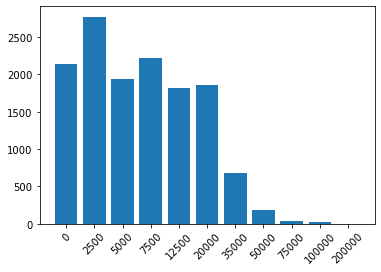

In [3]:
# auto_dataset = myutils.clean_data(auto_dataset)
# auto_dataset.convert_to_int()
# auto_dataset_explored = MyPyTable(column_names=["pricesold","yearsold","Mileage","Make","Model","Year","BodyType","NumCylinders","DriveType"])
# auto_dataset_explored = mysklearn.myutils.create_MyPyTable_for_auto_set(auto_dataset)
# auto_dataset_explored.remove_rows_with_missing_values()
# prices = auto_dataset_explored.get_column("pricesold")
# discritized_prices, ranges = myutils.discretize_sales_price(prices)
# myutils.plot_prices(discritized_prices, ranges)
importlib.reload(mysklearn.myutils)
importlib.reload(myutils)

auto_dataset = myutils.clean_data(auto_dataset)
auto_dataset_explored = MyPyTable(column_names=["pricesold","yearsold","Make","Model","Year","BodyType","NumCylinders","DriveType"])
auto_dataset_explored = mysklearn.myutils.create_MyPyTable_for_auto_set(auto_dataset)
auto_dataset_explored.remove_rows_with_missing_values()
prices = auto_dataset_explored.get_column("pricesold")
discritized_prices, ranges = myutils.discretize_sales_price(prices)
myutils.plot_prices(discritized_prices, ranges)
price_sold = auto_dataset.get_column("pricesold")
year_sold = auto_dataset.get_column("yearsold")
make = auto_dataset.get_column("Make")
year = auto_dataset.get_column("Year")
body_type = auto_dataset.get_column("BodyType")
num_cylinders = auto_dataset.get_column("NumCylinders")
drive_type = auto_dataset.get_column("DriveType")



In [4]:
X_train = mysklearn.myutils.create_X_train_for_auto_set_without_prices(auto_dataset_explored)
folds = myevaluation.stratified_kfold_split(X_train, discritized_prices, random_state=0)
actual_train_folds = []
actual_test_folds = []
for fold in folds:
    temp_x_train = []
    temp_x_test = []
    temp_y_train = []
    temp_y_test = []
    place = 0
    for item in fold:   
        for i in item:
            if place == 0:
                temp_x_train.append([year_sold[i], make[i], year[i], body_type[i], num_cylinders[i], drive_type[i]])
                temp_y_train.append(discritized_prices[i])
                
            else:
                temp_x_test.append([year_sold[i], make[i], year[i], body_type[i], num_cylinders[i], drive_type[i]])
                temp_y_test.append(discritized_prices[i])
        place += 1
    actual_train_folds.append((temp_x_train, temp_y_train))
    actual_test_folds.append((temp_x_test, temp_y_test))
count = 1

### Fixing Noise

In [5]:

X_train = actual_test_folds[0][0]
y_train = actual_train_folds[0][1]
X_test = actual_test_folds[0][0]
y_test = actual_test_folds[0][1]

pickup = ['Pickup',"Standard Cab Pickup", 'Crew Cab Pickup','Extended Cab Pickup','Pickup (Truck)','Regular Cab Pickup','Pickup Truck','Truck',
        'Cab & Chassis','truck','Pick Up','Quad Cab Extended Pickup', 'Crew Cab Chassis-Cab', 'Short Bed','Double Cab/Long Bed',
        'Standard cab Short bed','Extended Crew Cab Pickup','DUMP','Access Cab','PICKUP','Short bed pickup','Pick up',
        "I think it's a Styleside, Long Bed",'REGULAR CAB','4DR 4x4 Pickup Truck','step side short bed','pick up']
for val in X_train:
    if val[3] in pickup:
        val[3] = "pickup"

sedan = ['Sedan','4dr Car','4 Door','Four-Door Hardtop','4 DOOR SEDAN','Sport Sedan','Touring','4 Door White','SEDAN']
for val in X_train:
    if val[3] in sedan:
        val[3] = "sedan"

coupe = ['Coupe','Fastback','hardtop','2dr Car','2 Door Coupe','2 Dr','Hardtop 2 Door','Targa','Fastback Coupe','2-Seat Roadster','2d : 2 Door Hard TOP',
    'Hardtop','Victoria Coupe','Tudor','2DR Ht','Hardtop Fastback','T-Top','2 Door Sport Coupe','Roadster', 'Coupe with Removable Top','2 door',
    '2 door coupe deluxe','roadster', '2 door post','2-DOOR HARD TOP COUPE','2 Door','2 door Hardtop','Beetle','2 Door Hardtop''Hard top','MR2 Spyder conv.',]
for val in X_train:
    if val[3] in coupe:
        val[3] = "coupe"

SUV = ['SUV','Sport Utility','Minivan', 'Mini-van, Passenger','4D Sport Utility',
    'CHASSIS', 'JEEP','Conv', 'Suv','Sport Utility AWD Navi','Utility Body','suburban','its a CJ !!']
for val in X_train:
    if val[3] in SUV:
        val[3] = "suv"

Van = ['Standard Passenger Van','CONVERSION VAN', 'Van','Extended Passenger Van', 'Van Camper',
    'HighTop Conversion Van', 'High roof 144 walk through van', 'Minivan/Van', 'Full-size Cargo Van','CARGO', 'mid-bus',
     'cargo van', 'Microbus','Bus', 'VAN','Cargo Van']
for val in X_train:
    if val[3] in Van:
        val[3] = "van"

other = ['Convertible', '', 'Limousine', 'Hatchback', 'Wagon', 'Hardtop Convertible', 'Converible', 'LL', '--',
    '4 door limo', 'WAGON', 'Hard top', '2 Door Convertible', '2 door covertable', 'Hearse', 'Convertible Coupe',
    'Station Wagon', 1966.0, 'Superior Hearse', 'Other', 'Silver Spirit', 'Rally', 'SWB']
for val in X_train:
    if val[3] in other:
        val[3] = "other"

all_values = []
for val in X_train:
    if val[3] not in all_values:
        all_values.append(val[3])
print(all_values)


['suv', 'pickup', 'coupe', 'sedan', 'other', 'van', '2 Door Hardtop']


### Dummy Classifier

In [6]:
dummy = MyDummyClassifier()
dummy.fit(X_train, y_train)
y_predicted = dummy.predict(actual_test_folds[0][0])
print("Accuracy: ", myevaluation.accuracy_score(actual_test_folds[0][1], y_predicted))
print("Error Rate: ", 1.0 - myevaluation.accuracy_score(actual_test_folds[0][1], y_predicted))
   

Accuracy:  0.20285609666788723
Error Rate:  0.7971439033321128


### Bayes Classifier

In [8]:
bayes = MyNaiveBayesClassifier()
bayes.fit(X_train, y_train)
y_predicted = bayes.predict(actual_test_folds[actual_train_folds.index(fold)][0])
print("Accuracy: ", myevaluation.accuracy_score(actual_test_folds[0][1], y_predicted))
print("Error Rate: ", 1.0 - myevaluation.accuracy_score(actual_test_folds[0][1], y_predicted))



ValueError: ([0, 3, 4, 6, 10, 14, 16, 22, 29, 36, 50, 56, 76, 77, 81, 93, 99, 104, 105, 106, 114, 117, 118, 119, 121, 125, 127, 129, 137, 139, 143, 145, 149, 151, 152, 156, 164, 165, 170, 174, 186, 188, 207, 211, 232, 234, 237, 242, 253, 267, 276, 279, 298, 303, 306, 317, 327, 347, 360, 362, 367, 378, 379, 381, 384, 428, 433, 437, 458, 462, 470, 472, 474, 478, 484, 487, 511, 512, 519, 525, 535, 540, 547, 548, 563, 569, 571, 577, 589, 593, 598, 601, 619, 631, 634, 636, 641, 661, 662, 668, 692, 693, 702, 713, 727, 731, 744, 752, 761, 776, 777, 779, 794, 796, 797, 798, 803, 804, 822, 828, 831, 838, 846, 855, 859, 889, 890, 894, 904, 908, 914, 917, 921, 922, 923, 924, 932, 934, 935, 939, 941, 942, 946, 948, 960, 964, 965, 979, 983, 987, 994, 997, 1014, 1030, 1031, 1041, 1050, 1057, 1059, 1060, 1084, 1087, 1088, 1094, 1100, 1109, 1126, 1127, 1140, 1143, 1146, 1149, 1166, 1167, 1174, 1190, 1194, 1201, 1207, 1213, 1216, 1227, 1228, 1230, 1248, 1251, 1263, 1264, 1271, 1275, 1281, 1283, 1288, 1295, 1296, 1301, 1307, 1313, 1315, 1331, 1338, 1343, 1346, 1347, 1357, 1369, 1373, 1374, 1380, 1381, 1386, 1387, 1416, 1418, 1425, 1427, 1437, 1443, 1452, 1453, 1455, 1456, 1469, 1476, 1483, 1485, 1487, 1491, 1536, 1544, 1545, 1597, 1764, 1765, 1772, 1789, 1812, 1851, 1876, 1878, 1889, 1905, 1906, 1922, 1925, 1926, 1927, 1932, 1938, 1948, 1954, 1968, 1974, 1979, 1983, 1985, 1995, 2006, 2007, 2008, 2010, 2023, 2026, 2027, 2030, 2036, 2037, 2038, 2040, 2043, 2044, 2045, 2065, 2072, 2073, 2074, 2084, 2085, 2086, 2087, 2092, 2096, 2097, 2098, 2105, 2119, 2128, 2131, 2135, 2136, 2139, 2140, 2146, 2148, 2149, 2159, 2162, 2163, 2164, 2173, 2177, 2178, 2179, 2182, 2184, 2186, 2188, 2189, 2192, 2193, 2199, 2202, 2212, 2218, 2219, 2221, 2226, 2227, 2228, 2230, 2236, 2237, 2238, 2239, 2244, 2247, 2250, 2252, 2258, 2262, 2263, 2264, 2275, 2277, 2281, 2282, 2286, 2287, 2289, 2305, 2320, 2321, 2329, 2335, 2341, 2342, 2343, 2344, 2349, 2350, 2355, 2356, 2361, 2362, 2363, 2364, 2368, 2377, 2380, 2381, 2385, 2410, 2420, 2426, 2428, 2441, 2454, 2462, 2476, 2479, 2481, 2483, 2489, 2493, 2508, 2511, 2521, 2524, 2525, 2528, 2535, 2541, 2547, 2548, 2553, 2562, 2567, 2568, 2572, 2574, 2578, 2579, 2585, 2586, 2592, 2600, 2607, 2609, 2623, 2630, 2664, 2666, 2671, 2677, 2681, 2686, 2689, 2690, 2696, 2699, 2700, 2705, 2714, 2733, 2734, 2737, 2754, 2756, 2766, 2787, 2793, 2794, 2795, 2801, 2807, 2810, 2819, 2834, 2853, 2870, 2875, 2896, 2898, 2899, 2912, 2913, 2924, 2927, 2928, 2929, 2936, 2937, 2939, 2944, 2960, 2963, 2986, 2991, 2994, 3000, 3003, 3004, 3010, 3011, 3013, 3014, 3017, 3021, 3032, 3033, 3044, 3048, 3053, 3054, 3061, 3068, 3072, 3077, 3081, 3082, 3083, 3085, 3093, 3099, 3155, 3177, 3188, 3191, 3192, 3193, 3207, 3209, 3212, 3223, 3238, 3246, 3254, 3255, 3262, 3263, 3266, 3271, 3273, 3294, 3298, 3299, 3309, 3311, 3314, 3321, 3346, 3354, 3365, 3369, 3381, 3382, 3384, 3386, 3391, 3393, 3394, 3395, 3402, 3407, 3435, 3450, 3466, 3468, 3470, 3477, 3488, 3489, 3493, 3496, 3508, 3509, 3510, 3520, 3537, 3541, 3543, 3547, 3559, 3561, 3584, 3593, 3600, 3601, 3613, 3617, 3630, 3635, 3639, 3669, 3676, 3677, 3686, 3700, 3706, 3712, 3714, 3715, 3733, 3735, 3739, 3740, 3749, 3751, 3756, 3768, 3776, 3777, 3791, 3808, 3812, 3815, 3870, 3883, 3894, 3909, 3911, 3914, 3934, 3946, 3954, 3957, 3965, 3971, 3974, 3997, 4006, 4008, 4024, 4026, 4032, 4033, 4037, 4043, 4046, 4047, 4048, 4049, 4064, 4067, 4069, 4073, 4079, 4082, 4089, 4091, 4096, 4098, 4111, 4112, 4117, 4121, 4123, 4125, 4127, 4132, 4134, 4135, 4141, 4144, 4146, 4148, 4152, 4153, 4155, 4159, 4169, 4170, 4171, 4199, 4234, 4235, 4247, 4248, 4273, 4298, 4300, 4303, 4312, 4314, 4321, 4329, 4352, 4356, 4357, 4359, 4375, 4376, 4383, 4394, 4399, 4403, 4410, 4411, 4415, 4420, 4422, 4423, 4440, 4446, 4449, 4468, 4495, 4496, 4497, 4499, 4505, 4511, 4518, 4528, 4537, 4540, 4549, 4550, 4567, 4569, 4570, 4573, 4606, 4608, 4640, 4641, 4651, 4652, 4678, 4687, 4704, 4705, 4725, 4737, 4748, 4750, 4752, 4753, 4758, 4762, 4793, 4805, 4825, 4832, 4835, 4836, 4838, 4852, 4853, 4854, 4858, 4874, 4888, 4900, 4903, 4904, 4916, 4927, 4948, 4957, 4970, 4973, 4976, 4986, 4992, 4997, 4999, 5000, 5002, 5005, 5012, 5020, 5024, 5034, 5041, 5042, 5046, 5052, 5059, 5063, 5093, 5094, 5107, 5114, 5120, 5139, 5148, 5161, 5190, 5192, 5238, 5253, 5269, 5276, 5278, 5279, 5287, 5291, 5333, 5338, 5340, 5344, 5352, 5354, 5355, 5356, 5358, 5362, 5363, 5371, 5376, 5387, 5388, 5392, 5398, 5435, 5441, 5455, 5458, 5461, 5479, 5500, 5508, 5510, 5512, 5518, 5520, 5544, 5548, 5552, 5555, 5560, 5561, 5566, 5570, 5574, 5587, 5594, 5760, 5761, 5791, 5913, 6066, 6160, 6181, 6385, 6527, 6707, 6711, 6713, 6728, 6747, 6770, 6771, 6782, 6790, 6795, 6805, 6816, 6818, 6819, 6821, 6831, 6833, 6835, 6836, 6844, 6845, 6850, 6851, 6880, 6882, 6883, 6885, 6889, 6894, 6897, 6899, 6907, 6908, 6910, 6923, 6927, 6932, 6938, 6939, 6958, 6973, 7004, 7005, 7018, 7021, 7031, 7032, 7058, 7070, 7071, 7078, 7099, 7104, 7107, 7117, 7120, 7124, 7128, 7129, 7137, 7138, 7139, 7140, 7142, 7144, 7145, 7146, 7150, 7151, 7152, 7157, 7162, 7163, 7165, 7167, 7182, 7187, 7205, 7206, 7208, 7209, 7223, 7226, 7234, 7249, 7253, 7256, 7270, 7278, 7281, 7282, 7315, 7318, 7329, 7330, 7351, 7354, 7358, 7361, 7367, 7373, 7374, 7375, 7387, 7388, 7391, 7394, 7407, 7408, 7411, 7422, 7441, 7447, 7448, 7457, 7462, 7465, 7476, 7483, 7498, 7500, 7507, 7508, 7515, 7523, 7525, 7529, 7538, 7542, 7543, 7561, 7566, 7582, 7583, 7585, 7597, 7599, 7601, 7622, 7632, 7637, 7647, 7651, 7677, 7680, 7682, 7687, 7692, 7696, 7701, 7716, 7719, 7721, 7725, 7726, 7755, 7761, 7762, 7764, 7777, 7780, 7795, 7797, 7799, 7814, 7816, 7817, 7833, 7841, 7847, 7857, 7886, 7890, 7893, 7899, 7904, 7908, 7913, 7914, 7924, 7926, 7946, 7949, 7959, 7973, 7979, 7981, 7985, 7988, 7992, 7997, 7999, 8010, 8011, 8013, 8016, 8018, 8019, 8020, 8022, 8025, 8026, 8028, 8050, 8051, 8054, 8059, 8078, 8091, 8092, 8094, 8108, 8114, 8117, 8139, 8142, 8143, 8146, 8185, 8192, 8196, 8199, 8207, 8220, 8221, 8224, 8225, 8235, 8241, 8243, 8252, 8266, 8271, 8273, 8274, 8297, 8313, 8331, 8334, 8346, 8348, 8356, 8370, 8379, 8383, 8384, 8392, 8409, 8412, 8413, 8415, 8420, 8427, 8433, 8434, 8437, 8438, 8439, 8452, 8454, 8458, 8464, 8467, 8470, 8473, 8476, 8482, 8486, 8492, 8493, 8499, 8503, 8504, 8505, 8507, 8516, 8519, 8520, 8522, 8526, 8528, 8532, 8533, 8538, 8545, 8547, 8548, 8561, 8563, 8569, 8571, 8573, 8574, 8575, 8576, 8585, 8586, 8587, 8590, 8593, 8597, 8599, 8604, 8613, 8616, 8617, 8623, 8638, 8651, 8659, 8666, 8675, 8676, 8679, 8705, 8709, 8710, 8748, 8758, 8775, 8776, 8779, 8780, 8784, 8788, 8793, 8795, 8810, 8814, 8831, 8832, 8847, 8850, 8861, 8863, 8869, 8870, 8871, 8876, 8881, 8882, 8893, 8903, 8925, 8928, 8933, 8934, 8966, 8990, 8991, 8994, 8997, 9000, 9013, 9014, 9022, 9033, 9038, 9047, 9061, 9063, 9065, 9070, 9076, 9079, 9081, 9090, 9092, 9093, 9095, 9096, 9107, 9108, 9114, 9127, 9132, 9133, 9134, 9135, 9147, 9166, 9168, 9176, 9180, 9200, 9201, 9202, 9212, 9225, 9226, 9257, 9267, 9273, 9274, 9345, 9438, 9439, 9486, 9553, 9564, 9581, 9598, 9610, 9617, 9622, 9632, 9653, 9655, 9656, 9669, 9670, 9673, 9674, 9675, 9680, 9684, 9685, 9686, 9687, 9691, 9708, 9716, 9736, 9739, 9740, 9741, 9765, 9781, 9782, 9789, 9791, 9803, 9805, 9820, 9821, 9874, 9876, 9890, 9894, 9896, 9897, 9898, 9900, 9907, 9912, 9920, 9921, 9935, 9936, 9939, 9944, 9947, 9950, 9957, 9958, 9960, 9962, 9963, 9964, 9977, 9985, 9987, 9994, 10001, 10010, 10013, 10026, 10033, 10036, 10057, 10065, 10072, 10079, 10080, 10085, 10099, 10106, 10107, 10113, 10122, 10123, 10124, 10125, 10130, 10135, 10139, 10152, 10157, 10161, 10162, 10168, 10172, 10183, 10188, 10190, 10203, 10204, 10205, 10207, 10214, 10215, 10216, 10223, 10232, 10241, 10247, 10252, 10270, 10279, 10280, 10299, 10320, 10324, 10328, 10329, 10347, 10349, 10361, 10372, 10375, 10385, 10386, 10399, 10417, 10419, 10422, 10426, 10472, 10476, 10478, 10491, 10514, 10526, 10527, 10529, 10537, 10544, 10547, 10548, 10582, 10583, 10584, 10597, 10602, 10610, 10627, 10639, 10664, 10665, 10666, 10675, 10679, 10680, 10683, 10710, 10714, 10728, 10729, 10734, 10750, 10751, 10757, 10763, 10773, 10779, 10780, 10794, 10806, 10807, 10812, 10813, 10818, 10842, 10848, 10859, 10866, 10872, 10875, 10898, 10906, 10915, 10917, 10927, 10946, 10947, 10950, 10963, 10980, 10983, 10984, 10988, 10994, 11001, 11002, 11003, 11015, 11027, 11037, 11043, 11046, 11048, 11049, 11058, 11065, 11075, 11076, 11077, 11081, 11084, 11093, 11094, 11105, 11116, 11125, 11143, 11159, 11160, 11168, 11172, 11175, 11176, 11178, 11182, 11186, 11191, 11198, 11217, 11220, 11221, 11231, 11233, 11252, 11253, 11256, 11262, 11270, 11275, 11292, 11293, 11338, 11343, 11345, 11352, 11364, 11365, 11366, 11367, 11374, 11377, 11378, 11386, 11398, 11401, 11402, 11405, 11428, 11429, 11431, 11433, 11453, 11454, 11459, 11465, 11473, 11474, 11479, 11484, 11486, 11488, 11500, 11502, 11528, 11539, 11592, 11597, 11604, 11625, 11626, 11627, 11643, 11645, 11650, 11651, 11656, 11774, 11794, 11805, 11829, 11832, 11837, 11863, 11889, 11912, 11921, 11922, 11940, 11943, 11944, 11948, 11953, 11977, 12023, 12024, 12033, 12046, 12051, 12057, 12073, 12075, 12076, 12077, 12079, 12080, 12081, 12083, 12090, 12093, 12096, 12131, 12148, 12149, 12150, 12153, 12160, 12165, 12168, 12171, 12175, 12203, 12207, 12211, 12216, 12217, 12221, 12238, 12253, 12254, 12268, 12269, 12273, 12298, 12300, 12302, 12310, 12313, 12314, 12316, 12320, 12322, 12325, 12329, 12332, 12333, 12334, 12340, 12351, 12353, 12361, 12382, 12391, 12393, 12398, 12402, 12417, 12418, 12419, 12420, 12426, 12428, 12440, 12443, 12451, 12457, 12459, 12464, 12473, 12478, 12487, 12492, 12498, 12504, 12508, 12514, 12527, 12528, 12531, 12535, 12539, 12540, 12542, 12544, 12548, 12549, 12552, 12556, 12560, 12561, 12564, 12566, 12570, 12571, 12573, 12589, 12608, 12610, 12612, 12614, 12617, 12621, 12623, 12624, 12628, 12634, 12636, 12637, 12652, 12653, 12654, 12655, 12661, 12671, 12674, 12684, 12695, 12696, 12697, 12706, 12710, 12720, 12721, 12722, 12730, 12737, 12740, 12741, 12759, 12763, 12764, 12771, 12779, 12780, 12785, 12791, 12811, 12815, 12819, 12833, 12839, 12840, 12841, 12844, 12847, 12848, 12849, 12851, 12855, 12856, 12860, 12864, 12893, 12895, 12897, 12900, 12912, 12917, 12918, 12925, 12933, 12935, 12936, 12937, 12942, 12950, 12952, 12954, 12965, 12968, 12969, 12980, 12984, 12987, 12990, 12991, 13009, 13012, 13024, 13031, 13033, 13034, 13040, 13043, 13053, 13055, 13061, 13066, 13073, 13074, 13083, 13084, 13100, 13114, 13119, 13120, 13125, 13153, 13163, 13165, 13219, 13222, 13223, 13236, 13251, 13256, 13261, 13271, 13279, 13280, 13283, 13286, 13290, 13294, 13298, 13304, 13308, 13316, 13322, 13326, 13341, 13347, 13361, 13362, 13365, 13368, 13371, 13372, 13379, 13384, 13385, 13387, 13412, 13414, 13415, 13418, 13447, 13451, 13453, 13461, 13467, 13472, 13474, 13475, 13484, 13488, 13494, 13495, 13499, 13507, 13510, 13521, 13529, 13535, 13543, 13561, 13564, 13566, 13567, 13568, 13584, 13592, 13599, 13601, 13604, 13610, 13613, 13614, 13646, 1, 17, 18, 39, 52, 67, 68, 102, 103, 107, 108, 110, 112, 115, 122, 132, 133, 135, 138, 147, 150, 155, 163, 167, 171, 185, 189, 205, 206, 217, 219, 229, 235, 258, 259, 262, 273, 286, 287, 292, 294, 304, 311, 325, 330, 343, 345, 365, 386, 387, 392, 434, 439, 444, 452, 486, 490, 497, 500, 509, 529, 531, 543, 551, 554, 555, 557, 564, 568, 570, 573, 607, 612, 614, 632, 635, 637, 645, 646, 660, 695, 793, 795, 801, 802, 813, 821, 833, 835, 837, 839, 853, 854, 877, 880, 891, 893, 901, 930, 956, 963, 967, 968, 984, 985, 996, 998, 1000, 1004, 1006, 1008, 1021, 1024, 1029, 1032, 1047, 1058, 1063, 1086, 1142, 1160, 1173, 1178, 1186, 1187, 1189, 1198, 1218, 1223, 1234, 1238, 1256, 1258, 1261, 1268, 1289, 1290, 1294, 1297, 1323, 1332, 1334, 1348, 1366, 1375, 1383, 1384, 1394, 1408, 1410, 1411, 1420, 1447, 1484, 1495, 1502, 1503, 1513, 1515, 1525, 1538, 1539, 1552, 1561, 1562, 1564, 1565, 1569, 1572, 1576, 1581, 1598, 1609, 1613, 1615, 1620, 1643, 1659, 1683, 1686, 1695, 1715, 1716, 1725, 1729, 1733, 1745, 1770, 1776, 1803, 1807, 1838, 1841, 1846, 1849, 1877, 1879, 1880, 1881, 1893, 1899, 1907, 1914, 1917, 1924, 1928, 1929, 1940, 1951, 1958, 1959, 1981, 1988, 1996, 1999, 2003, 2014, 2016, 2017, 2020, 2021, 2025, 2028, 2052, 2055, 2057, 2064, 2067, 2068, 2069, 2070, 2076, 2090, 2093, 2094, 2103, 2107, 2108, 2109, 2117, 2118, 2121, 2126, 2151, 2152, 2153, 2154, 2158, 2200, 2201, 2204, 2207, 2208, 2224, 2225, 2248, 2254, 2256, 2257, 2260, 2265, 2267, 2268, 2271, 2272, 2273, 2274, 2279, 2280, 2285, 2290, 2294, 2295, 2298, 2299, 2302, 2303, 2304, 2309, 2313, 2314, 2315, 2316, 2319, 2324, 2327, 2328, 2331, 2339, 2340, 2354, 2371, 2373, 2374, 2375, 2378, 2388, 2389, 2390, 2401, 2406, 2407, 2408, 2411, 2414, 2416, 2417, 2419, 2424, 2425, 2429, 2436, 2438, 2440, 2447, 2450, 2453, 2458, 2459, 2463, 2468, 2469, 2474, 2478, 2482, 2484, 2490, 2494, 2495, 2496, 2500, 2505, 2510, 2512, 2517, 2539, 2546, 2552, 2558, 2575, 2577, 2580, 2589, 2591, 2595, 2597, 2603, 2614, 2620, 2627, 2638, 2645, 2649, 2652, 2653, 2655, 2657, 2663, 2667, 2679, 2682, 2683, 2684, 2712, 2713, 2715, 2716, 2731, 2735, 2738, 2751, 2755, 2759, 2771, 2772, 2782, 2784, 2797, 2808, 2813, 2815, 2820, 2822, 2830, 2831, 2835, 2837, 2854, 2859, 2860, 2861, 2868, 2879, 2907, 2911, 2930, 2933, 2938, 2940, 2953, 2964, 2979, 2987, 3019, 3024, 3028, 3103, 3189, 3203, 3219, 3222, 3252, 3281, 3297, 3301, 3317, 3318, 3319, 3329, 3331, 3339, 3342, 3348, 3355, 3361, 3362, 3364, 3372, 3396, 3405, 3406, 3420, 3431, 3437, 3438, 3448, 3452, 3471, 3480, 3487, 3511, 3515, 3528, 3536, 3542, 3557, 3558, 3570, 3581, 3598, 3603, 3616, 3626, 3628, 3633, 3653, 3663, 3664, 3701, 3724, 3726, 3731, 3754, 3780, 3782, 3803, 3817, 3835, 3836, 3867, 3868, 3880, 3881, 3892, 3907, 3916, 3917, 3921, 3930, 3943, 3948, 3950, 3953, 3977, 3978, 3989, 3996, 4000, 4001, 4007, 4009, 4027, 4028, 4055, 4061, 4063, 4071, 4074, 4076, 4081, 4083, 4088, 4090, 4102, 4103, 4105, 4106, 4109, 4110, 4115, 4118, 4120, 4122, 4130, 4131, 4136, 4138, 4143, 4147, 4154, 4166, 4167, 4172, 4190, 4201, 4208, 4210, 4219, 4223, 4224, 4229, 4241, 4250, 4259, 4260, 4266, 4276, 4277, 4281, 4308, 4326, 4327, 4328, 4337, 4341, 4348, 4349, 4354, 4355, 4358, 4360, 4368, 4377, 4384, 4392, 4409, 4413, 4429, 4437, 4460, 4463, 4464, 4467, 4482, 4490, 4500, 4509, 4519, 4520, 4521, 4524, 4533, 4538, 4548, 4556, 4571, 4576, 4584, 4586, 4600, 4601, 4621, 4627, 4632, 4633, 4638, 4639, 4650, 4661, 4662, 4664, 4682, 4692, 4694, 4695, 4720, 4731, 4735, 4736, 4763, 4764, 4772, 4774, 4785, 4789, 4791, 4798, 4803, 4804, 4806, 4819, 4823, 4827, 4829, 4830, 4842, 4843, 4845, 4855, 4870, 4875, 4882, 4886, 4912, 4914, 4920, 4921, 4926, 4928, 4936, 4945, 4956, 4964, 4975, 4985, 5003, 5021, 5022, 5023, 5030, 5036, 5050, 5056, 5083, 5085, 5088, 5089, 5096, 5108, 5113, 5117, 5124, 5126, 5130, 5142, 5152, 5153, 5154, 5165, 5177, 5179, 5203, 5245, 5255, 5256, 5257, 5258, 5265, 5271, 5275, 5284, 5290, 5322, 5327, 5343, 5351, 5353, 5360, 5381, 5403, 5406, 5409, 5421, 5428, 5430, 5434, 5445, 5454, 5456, 5465, 5471, 5485, 5488, 5489, 5490, 5503, 5507, 5509, 5515, 5529, 5530, 5536, 5539, 5541, 5569, 5573, 6701, 6714, 6719, 6720, 6732, 6743, 6757, 6766, 6767, 6784, 6785, 6791, 6794, 6808, 6810, 6814, 6815, 6830, 6834, 6837, 6839, 6849, 6860, 6869, 6879, 6884, 6886, 6890, 6891, 6896, 6903, 6906, 6909, 6912, 6914, 6919, 6922, 6930, 6933, 6940, 6944, 6966, 6978, 6982, 6986, 6997, 7000, 7008, 7013, 7022, 7023, 7024, 7053, 7062, 7065, 7067, 7069, 7082, 7085, 7087, 7121, 7123, 7126, 7130, 7135, 7143, 7153, 7155, 7156, 7160, 7161, 7172, 7176, 7211, 7219, 7221, 7227, 7237, 7239, 7240, 7244, 7250, 7254, 7265, 7268, 7279, 7280, 7284, 7286, 7300, 7316, 7324, 7328, 7342, 7343, 7349, 7352, 7360, 7382, 7413, 7420, 7432, 7433, 7436, 7437, 7454, 7459, 7469, 7471, 7480, 7481, 7484, 7487, 7492, 7494, 7495, 7504, 7527, 7544, 7556, 7565, 7606, 7607, 7618, 7620, 7640, 7644, 7646, 7657, 7662, 7674, 7703, 7706, 7732, 7733, 7736, 7744, 7749, 7756, 7760, 7766, 7770, 7771, 7778, 7779, 7813, 7818, 7821, 7822, 7834, 7838, 7843, 7844, 7878, 7879, 7887, 7888, 7891, 7892, 7895, 7896, 7912, 7917, 7921, 7923, 7939, 7944, 7951, 7954, 7965, 7971, 7976, 7983, 7987, 8000, 8003, 8004, 8029, 8035, 8044, 8048, 8061, 8063, 8067, 8075, 8089, 8093, 8095, 8107, 8111, 8112, 8113, 8115, 8123, 8127, 8129, 8161, 8163, 8169, 8182, 8198, 8206, 8213, 8216, 8223, 8262, 8275, 8276, 8285, 8289, 8294, 8302, 8303, 8312, 8315, 8319, 8320, 8325, 8329, 8332, 8337, 8352, 8359, 8375, 8390, 8410, 8423, 8425, 8446, 8457, 8460, 8466, 8472, 8484, 8487, 8490, 8500, 8515, 8517, 8534, 8562, 8566, 8570, 8578, 8579, 8588, 8592, 8594, 8595, 8619, 8621, 8622, 8633, 8637, 8644, 8648, 8669, 8680, 8682, 8683, 8688, 8713, 8719, 8726, 8727, 8734, 8739, 8740, 8755, 8765, 8771, 8772, 8783, 8798, 8801, 8816, 8817, 8835, 8837, 8842, 8845, 8856, 8857, 8865, 8874, 8879, 8894, 8901, 8927, 8941, 8942, 8943, 8945, 8949, 8957, 8964, 8967, 9001, 9004, 9010, 9034, 9036, 9043, 9067, 9084, 9109, 9125, 9136, 9140, 9167, 9169, 9263, 9265, 9270, 9281, 9286, 9303, 9305, 9306, 9307, 9309, 9336, 9343, 9354, 9355, 9400, 9408, 9431, 9432, 9435, 9487, 9488, 9490, 9511, 9514, 9520, 9522, 9545, 9550, 9552, 9570, 9580, 9589, 9608, 9609, 9619, 9621, 9624, 9628, 9631, 9634, 9635, 9639, 9651, 9652, 9666, 9671, 9678, 9710, 9712, 9714, 9732, 9738, 9767, 9769, 9775, 9784, 9793, 9794, 9809, 9816, 9827, 9828, 9880, 9886, 9889, 9892, 9916, 9919, 9923, 9924, 9926, 9927, 9929, 9932, 9942, 9961, 9965, 9966, 9972, 9975, 9982, 9988, 9991, 9992, 9993, 9995, 10004, 10021, 10024, 10028, 10040, 10043, 10067, 10075, 10098, 10109, 10116, 10132, 10137, 10138, 10159, 10173, 10192, 10196, 10200, 10202, 10218, 10226, 10233, 10235, 10251, 10259, 10268, 10271, 10277, 10278, 10281, 10284, 10296, 10298, 10301, 10302, 10313, 10316, 10317, 10318, 10321, 10325, 10326, 10327, 10342, 10348, 10351, 10359, 10410, 10412, 10425, 10428, 10453, 10454, 10457, 10458, 10470, 10477, 10479, 10490, 10498, 10499, 10500, 10503, 10507, 10510, 10512, 10516, 10521, 10524, 10525, 10533, 10545, 10546, 10551, 10554, 10557, 10558, 10559, 10562, 10572, 10585, 10598, 10605, 10613, 10622, 10625, 10630, 10648, 10651, 10652, 10654, 10656, 10660, 10668, 10670, 10674, 10676, 10699, 10703, 10717, 10721, 10724, 10731, 10736, 10739, 10741, 10747, 10782, 10783, 10796, 10797, 10802, 10828, 10831, 10838, 10854, 10856, 10867, 10884, 10899, 10907, 10912, 10924, 10948, 10956, 10957, 10965, 10967, 10972, 10979, 10995, 10998, 11000, 11023, 11026, 11029, 11035, 11038, 11039, 11042, 11056, 11059, 11061, 11067, 11074, 11082, 11086, 11108, 11162, 11164, 11181, 11190, 11192, 11193, 11214, 11219, 11222, 11235, 11246, 11264, 11272, 11273, 11284, 11286, 11289, 11290, 11291, 11310, 11312, 11321, 11322, 11329, 11337, 11348, 11349, 11355, 11360, 11380, 11395, 11407, 11412, 11413, 11419, 11456, 11463, 11477, 11483, 11496, 11505, 11510, 11536, 11544, 11548, 11549, 11551, 11563, 11572, 11585, 11587, 11598, 11599, 11600, 11602, 11618, 11619, 11620, 11624, 11633, 11756, 11769, 11790, 11807, 11830, 11831, 11834, 11838, 11841, 11864, 11865, 11880, 11881, 11892, 11898, 11906, 11915, 11945, 11950, 11969, 11976, 11999, 12025, 12029, 12030, 12041, 12058, 12064, 12065, 12066, 12068, 12071, 12082, 12084, 12087, 12089, 12091, 12092, 12094, 12138, 12145, 12146, 12147, 12156, 12157, 12164, 12177, 12182, 12200, 12202, 12209, 12223, 12224, 12233, 12237, 12246, 12260, 12281, 12285, 12299, 12301, 12303, 12311, 12341, 12350, 12363, 12386, 12401, 12415, 12416, 12421, 12425, 12429, 12446, 12452, 12455, 12456, 12460, 12466, 12488, 12489, 12494, 12506, 12533, 12546, 12555, 12565, 12574, 12575, 12577, 12580, 12609, 12616, 12622, 12631, 12644, 12648, 12657, 12663, 12681, 12682, 12699, 12700, 12702, 12713, 12716, 12718, 12727, 12734, 12735, 12751, 12757, 12768, 12769, 12770, 12773, 12775, 12776, 12778, 12784, 12786, 12794, 12795, 12803, 12812, 12820, 12821, 12830, 12831, 12832, 12834, 12836, 12837, 12842, 12843, 12858, 12859, 12861, 12865, 12896, 12898, 12902, 12910, 12927, 12940, 12943, 12944, 12948, 12951, 12955, 12960, 12979, 12983, 12997, 13007, 13030, 13039, 13042, 13049, 13098, 13099, 13101, 13109, 13116, 13118, 13129, 13133, 13139, 13156, 13217, 13220, 13243, 13248, 13249, 13252, 13274, 13287, 13291, 13296, 13299, 13310, 13321, 13328, 13338, 13339, 13340, 13358, 13360, 13364, 13366, 13370, 13376, 13378, 13386, 13388, 13398, 13399, 13411, 13417, 13435, 13437, 13440, 13445, 13449, 13452, 13458, 13460, 13469, 13485, 13492, 13493, 13526, 13530, 13540, 13541, 13552, 13557, 13560, 13575, 13586, 13591, 13594, 13595, 13608, 13623, 13625, 13626, 13632, 13634, 13637, 13641, 13654, 2, 5, 7, 31, 34, 49, 55, 78, 80, 83, 85, 98, 100, 116, 144, 154, 183, 199, 200, 220, 223, 226, 239, 251, 265, 271, 272, 277, 280, 297, 299, 305, 307, 316, 328, 342, 344, 352, 359, 371, 375, 377, 383, 432, 435, 441, 443, 465, 469, 481, 515, 530, 541, 545, 588, 608, 609, 621, 623, 653, 658, 659, 677, 685, 689, 691, 698, 703, 705, 708, 710, 717, 728, 730, 734, 737, 748, 749, 759, 771, 781, 782, 784, 815, 819, 820, 827, 847, 876, 881, 896, 905, 911, 913, 925, 927, 928, 929, 943, 953, 955, 966, 978, 992, 1016, 1045, 1061, 1072, 1073, 1074, 1076, 1083, 1092, 1097, 1098, 1102, 1103, 1105, 1110, 1112, 1114, 1116, 1117, 1122, 1123, 1124, 1128, 1130, 1132, 1134, 1137, 1144, 1145, 1147, 1153, 1157, 1162, 1164, 1165, 1199, 1200, 1202, 1206, 1229, 1252, 1253, 1254, 1265, 1266, 1276, 1287, 1293, 1299, 1300, 1305, 1312, 1314, 1317, 1318, 1325, 1340, 1351, 1354, 1362, 1371, 1395, 1396, 1405, 1406, 1441, 1450, 1458, 1460, 1461, 1463, 1465, 1466, 1467, 1468, 1486, 1488, 1489, 1490, 1505, 1507, 1512, 1514, 1912, 1918, 1919, 1935, 1955, 1965, 1966, 1967, 1975, 1992, 1993, 2011, 2033, 2034, 2035, 2042, 2075, 2077, 2078, 2080, 2082, 2083, 2088, 2089, 2099, 2102, 2106, 2130, 2134, 2138, 2141, 2142, 2150, 2156, 2157, 2160, 2166, 2167, 2168, 2169, 2171, 2172, 2175, 2176, 2181, 2185, 2187, 2190, 2195, 2196, 2197, 2210, 2214, 2215, 2216, 2217, 2231, 2233, 2240, 2241, 2245, 2246, 2278, 2301, 2334, 2345, 2346, 2347, 2359, 2360, 2365, 2367, 2383, 2386, 2415, 2506, 2520, 2522, 2537, 2538, 2554, 2566, 2573, 2582, 2588, 2602, 2604, 2608, 2646, 2660, 2685, 2687, 2698, 2704, 2710, 2711, 2729, 2742, 2743, 2744, 2762, 2788, 2805, 2811, 2825, 2828, 2836, 2839, 2847, 2850, 2856, 2863, 2867, 2869, 2871, 2873, 2892, 2901, 2905, 2906, 2910, 2914, 2915, 2921, 2926, 2931, 2951, 2952, 2955, 2965, 2966, 2995, 3006, 3016, 3029, 3030, 3035, 3039, 3042, 3043, 3046, 3049, 3050, 3052, 3056, 3057, 3058, 3062, 3064, 3065, 3066, 3067, 3070, 3071, 3073, 3074, 3076, 3078, 3080, 3086, 3089, 3092, 3100, 3105, 3107, 3164, 3174, 3179, 3181, 3183, 3187, 3197, 3204, 3210, 3214, 3216, 3226, 3233, 3241, 3245, 3253, 3256, 3259, 3260, 3265, 3267, 3268, 3276, 3295, 3296, 3300, 3303, 3326, 3336, 3340, 3344, 3353, 3356, 3357, 3371, 3378, 3383, 3385, 3387, 3390, 3397, 3400, 3426, 3434, 3449, 3455, 3462, 3475, 3476, 3478, 3482, 3497, 3498, 3499, 3501, 3507, 3524, 3531, 3538, 3549, 3563, 3609, 3614, 3619, 3624, 3631, 3632, 3660, 3667, 3668, 3678, 3695, 3697, 3699, 3713, 3746, 3748, 3764, 3766, 3793, 3794, 3809, 3810, 3830, 3839, 3860, 3861, 3882, 3885, 3887, 3888, 3908, 3913, 3927, 3939, 3947, 3952, 3962, 3964, 3983, 3988, 3990, 4011, 4036, 4038, 4040, 4045, 4052, 4053, 4059, 4065, 4077, 4080, 4095, 4097, 4108, 4137, 4140, 4145, 4158, 4168, 4174, 4180, 4183, 4192, 4196, 4200, 4211, 4220, 4232, 4240, 4313, 4315, 4319, 4322, 4338, 4339, 4347, 4363, 4374, 4379, 4388, 4389, 4418, 4430, 4433, 4453, 4471, 4481, 4485, 4504, 4514, 4526, 4529, 4535, 4547, 4562, 4563, 4565, 4574, 4578, 4593, 4598, 4607, 4676, 4679, 4680, 4859, 4895, 4896, 4897, 4917, 4939, 4960, 4961, 4967, 4969, 4971, 4972, 4979, 4980, 4981, 4982, 4988, 4989, 4993, 4994, 4996, 5001, 5004, 5008, 5025, 5029, 5038, 5040, 5075, 5084, 5087, 5095, 5110, 5112, 5118, 5122, 5129, 5133, 5134, 5140, 5172, 5175, 5185, 5188, 5247, 5332, 5336, 5347, 5365, 5366, 5368, 5378, 5383, 5442, 5460, 5463, 5492, 5511, 5514, 5543, 5551, 5553, 5556, 5557, 5564, 5571, 5588, 5589, 5596, 5597, 5598, 5599, 5602, 5603, 5604, 5605, 5697, 5699, 5700, 5701, 5725, 5759, 5762, 5763, 5812, 5813, 5814, 5816, 5818, 5820, 5821, 5827, 5877, 5879, 5880, 5882, 5884, 5885, 5887, 5892, 5896, 5898, 5904, 5914, 5916, 5917, 5918, 5919, 5921, 5922, 5923, 5924, 5926, 5927, 5930, 5935, 5943, 5944, 5945, 5948, 5952, 5993, 5997, 6030, 6034, 6036, 6038, 6039, 6041, 6042, 6044, 6045, 6064, 6067, 6070, 6071, 6076, 6077, 6078, 6082, 6093, 6096, 6097, 6098, 6100, 6101, 6102, 6104, 6106, 6107, 6108, 6109, 6132, 6154, 6155, 6158, 6176, 6177, 6178, 6180, 6183, 6189, 6192, 6193, 6218, 6220, 6221, 6222, 6224, 6225, 6226, 6227, 6229, 6231, 6232, 6233, 6237, 6238, 6239, 6245, 6247, 6248, 6249, 6285, 6296, 6303, 6304, 6318, 6325, 6378, 6382, 6383, 6386, 6387, 6388, 6389, 6406, 6408, 6419, 6420, 6423, 6424, 6425, 6431, 6443, 6467, 6470, 6471, 6488, 6512, 6514, 6516, 6520, 6521, 6524, 6525, 6530, 6531, 6532, 6533, 6568, 6585, 6596, 6619, 6623, 6626, 6642, 6645, 6647, 6649, 6684, 6685, 6693, 6694, 6695, 6696, 6702, 6704, 6706, 6708, 6710, 6712, 6729, 6731, 6739, 6740, 6746, 6758, 6776, 6798, 6799, 6800, 6823, 6829, 6854, 6898, 6901, 6917, 6924, 6928, 6935, 6950, 6955, 6956, 6976, 6977, 6979, 6981, 7017, 7038, 7039, 7054, 7060, 7064, 7076, 7077, 7106, 7108, 7109, 7110, 7132, 7133, 7147, 7148, 7166, 7181, 7183, 7194, 7202, 7203, 7204, 7210, 7233, 7245, 7246, 7262, 7272, 7273, 7276, 7290, 7325, 7332, 7337, 7355, 7366, 7369, 7372, 7386, 7392, 7393, 7396, 7398, 7401, 7403, 7404, 7409, 7412, 7425, 7442, 7443, 7449, 7452, 7477, 7489, 7520, 7522, 7537, 7540, 7554, 7555, 7559, 7570, 7575, 7576, 7578, 7581, 7586, 7590, 7592, 7594, 7596, 7598, 7600, 7603, 7612, 7617, 7623, 7648, 7653, 7658, 7671, 7679, 7688, 7689, 7695, 7699, 7704, 7711, 7731, 7742, 7768, 7772, 7774, 7782, 7785, 7786, 7794, 7796, 7807, 7808, 7811, 7827, 7835, 7849, 7856, 7864, 7873, 7900, 7905, 7910, 7931, 7941, 7980, 7991, 8009, 8012, 8017, 8023, 8027, 8030, 8031, 8036, 8043, 8045, 8072, 8082, 8101, 8116, 8126, 8130, 8136, 8137, 8138, 8148, 8159, 8164, 8165, 8166, 8174, 8179, 8184, 8186, 8208, 8210, 8211, 8212, 8219, 8234, 8238, 8240, 8244, 8245, 8272, 8279, 8284, 8290, 8295, 8298, 8309, 8310, 8314, 8330, 8340, 8341, 8372, 8377, 8393, 8397, 8398, 8430, 8440, 8448, 8485, 8540, 8555, 8557, 8560, 8565, 8568, 8577, 8580, 8582, 8602, 8607, 8611, 8615, 8629, 8635, 8642, 8658, 8661, 8662, 8663, 8665, 8700, 8703, 8706, 8707, 8721, 8725, 8728, 8736, 8747, 8751, 8760, 8766, 8773, 8774, 8777, 8778, 8785, 8787, 8789, 8791, 8799, 8866, 8883, 8900, 8907, 8915, 8916, 8919, 8923, 8930, 8956, 8963, 8980, 8988, 8993, 9005, 9016, 9017, 9019, 9025, 9050, 9052, 9075, 9077, 9089, 9120, 9122, 9131, 9142, 9149, 9157, 9160, 9162, 9163, 9164, 9172, 9174, 9175, 9183, 9184, 9187, 9188, 9203, 9207, 9209, 9210, 9211, 9213, 9215, 9216, 9222, 9243, 9245, 9246, 9247, 9248, 9251, 9252, 9253, 9254, 9258, 9260, 9261, 9262, 9547, 9551, 9555, 9556, 9559, 9561, 9565, 9566, 9576, 9592, 9593, 9595, 9597, 9599, 9602, 9604, 9692, 9696, 9697, 9707, 9725, 9727, 9742, 9751, 9772, 9790, 9792, 9799, 9804, 9846, 9848, 9849, 9862, 9863, 9870, 9875, 9901, 9903, 9904, 9906, 9909, 9917, 9918, 9937, 9955, 9956, 9969, 9970, 9986, 10002, 10007, 10009, 10029, 10035, 10037, 10059, 10062, 10070, 10071, 10073, 10082, 10083, 10084, 10093, 10104, 10105, 10118, 10121, 10129, 10131, 10134, 10140, 10150, 10155, 10156, 10163, 10169, 10174, 10191, 10194, 10224, 10234, 10243, 10250, 10267, 10307, 10336, 10346, 10357, 10366, 10377, 10378, 10381, 10391, 10403, 10414, 10431, 10443, 10444, 10445, 10487, 10489, 10511, 10517, 10535, 10540, 10564, 10566, 10589, 10592, 10594, 10595, 10629, 10635, 10643, 10649, 10677, 10711, 10730, 10737, 10760, 10761, 10762, 10774, 10799, 10808, 10810, 10822, 10835, 10837, 10845, 10860, 10908, 10923, 10933, 10934, 10981, 11009, 11013, 11018, 11036, 11044, 11063, 11068, 11071, 11072, 11073, 11083, 11107, 11117, 11118, 11134, 11142, 11145, 11150, 11152, 11177, 11179, 11180, 11195, 11228, 11230, 11236, 11240, 11257, 11258, 11271, 11287, 11309, 11319, 11324, 11327, 11334, 11336, 11342, 11361, 11371, 11375, 11381, 11382, 11396, 11403, 11404, 11410, 11416, 11417, 11425, 11432, 11468, 11481, 11487, 11491, 11493, 11497, 11498, 11504, 11512, 11516, 11517, 11520, 11537, 11538, 11609, 11610, 11622, 11639, 11640, 11641, 11653, 11657, 11658, 11766, 11835, 11862, 11894, 11919, 12026, 12027, 12036, 12037, 12072, 12074, 12095, 12098, 12103, 12105, 12128, 12139, 12174, 12178, 12179, 12181, 12187, 12191, 12192, 12213, 12232, 12240, 12241, 12245, 12249, 12252, 12255, 12257, 12276, 12278, 12282, 12296, 12309, 12328, 12330, 12367, 12390, 12396, 12397, 12399, 12438, 12448, 12461, 12462, 12485, 12501, 12502, 12529, 12532, 12534, 12537, 12538, 12547, 12551, 12553, 12554, 12559, 12562, 12563, 12569, 12583, 12591, 12593, 12599, 12602, 12618, 12627, 12635, 12649, 12666, 12672, 12673, 12692, 12703, 12714, 12731, 12746, 12747, 12749, 12754, 12761, 12767, 12787, 12788, 12799, 12800, 12802, 12804, 12817, 12822, 12823, 12825, 12890, 12894, 12906, 12938, 12985, 12992, 12996, 13000, 13016, 13017, 13018, 13019, 13022, 13026, 13046, 13047, 13058, 13060, 13076, 13078, 13080, 13082, 13087, 13117, 13122, 13126, 13135, 13143, 13154, 13161, 13225, 13226, 13235, 13253, 13255, 13269, 13314, 13324, 13330, 13331, 13346, 13367, 13369, 13381, 13383, 13394, 13416, 13421, 13441, 13457, 13464, 13477, 13508, 13514, 13520, 13522, 13527, 13531, 13532, 13533, 13537, 13538, 13539, 13544, 13548, 13549, 13555, 13578, 13589, 13593, 13609, 13612, 13624, 13635, 8, 13, 32, 44, 46, 51, 64, 73, 89, 90, 124, 172, 180, 182, 208, 212, 213, 216, 256, 269, 278, 295, 301, 323, 338, 358, 427, 429, 430, 436, 460, 468, 480, 488, 495, 524, 556, 559, 604, 605, 611, 616, 624, 626, 627, 640, 644, 647, 652, 655, 663, 664, 665, 666, 673, 674, 675, 678, 682, 686, 687, 688, 696, 697, 699, 700, 706, 707, 709, 711, 715, 716, 720, 722, 726, 733, 735, 738, 740, 742, 743, 745, 747, 750, 751, 753, 757, 758, 760, 764, 766, 767, 768, 769, 786, 789, 809, 810, 812, 816, 830, 848, 885, 886, 887, 909, 916, 918, 919, 933, 986, 993, 1010, 1017, 1034, 1043, 1066, 1067, 1078, 1080, 1081, 1085, 1090, 1091, 1095, 1096, 1107, 1108, 1113, 1118, 1121, 1125, 1133, 1135, 1161, 1163, 1172, 1182, 1224, 1236, 1273, 1292, 1320, 1326, 1341, 1353, 1356, 1364, 1367, 1388, 1391, 1397, 1399, 1400, 1402, 1403, 1404, 1407, 1417, 1419, 1422, 1431, 1442, 1462, 1471, 1473, 1504, 1506, 1508, 1509, 1960, 1962, 1977, 1978, 1984, 1986, 1991, 2032, 2137, 2203, 2213, 2232, 2487, 2530, 2532, 2533, 2536, 2544, 2545, 2722, 2740, 2774, 2778, 2781, 2790, 2792, 2812, 2814, 2833, 2848, 2857, 2893, 2908, 2918, 2945, 2946, 2980, 2984, 2989, 2992, 2997, 2998, 3008, 3012, 3025, 3027, 3031, 3037, 3040, 3041, 3047, 3051, 3094, 3096, 3098, 3109, 3116, 3117, 3118, 3119, 3122, 3123, 3124, 3125, 3127, 3128, 3129, 3130, 3132, 3133, 3134, 3135, 3139, 3141, 3142, 3145, 3147, 3148, 3149, 3150, 3152, 3153, 3154, 3157, 3160, 3161, 3175, 3182, 3211, 3215, 3220, 3225, 3231, 3232, 3234, 3235, 3257, 3275, 3284, 3323, 3328, 3333, 3334, 3337, 3367, 3374, 3380, 3392, 3429, 3454, 3456, 3457, 3459, 3463, 3469, 3473, 3494, 3495, 3512, 3513, 3519, 3522, 3535, 3548, 3564, 3577, 3578, 3582, 3587, 3590, 3591, 3597, 3623, 3656, 3673, 3674, 3681, 3682, 3683, 3685, 3690, 3692, 3696, 3698, 3703, 3705, 3709, 3711, 3729, 3758, 3762, 3763, 3774, 3775, 3784, 3786, 3820, 3840, 3841, 3846, 3852, 3854, 3857, 3858, 3862, 3863, 3878, 3889, 3901, 3904, 3906, 3942, 3949, 3955, 3969, 3975, 3984, 3993, 3994, 4016, 4039, 4041, 4042, 4051, 4057, 4060, 4072, 4084, 4156, 4157, 4163, 4175, 4177, 4178, 4179, 4182, 4195, 4198, 4206, 4212, 4221, 4222, 4238, 4253, 4306, 4316, 4335, 4340, 4380, 4381, 4386, 4387, 4419, 4421, 4436, 4439, 4444, 4447, 4452, 4454, 4456, 4478, 4484, 4507, 4531, 4532, 4534, 4544, 4894, 4908, 4910, 4911, 4933, 4935, 4941, 4950, 4966, 4968, 4978, 4984, 5011, 5013, 5014, 5019, 5043, 5055, 5067, 5070, 5076, 5082, 5098, 5101, 5103, 5104, 5135, 5137, 5174, 5178, 5184, 5325, 5337, 5342, 5345, 5348, 5375, 5377, 5384, 5386, 5449, 5464, 5474, 5480, 5502, 5513, 5521, 5522, 5527, 5550, 5562, 5568, 5577, 5578, 5579, 5580, 5582, 5585, 5586, 5590, 5592, 5593, 5601, 5607, 5609, 5611, 5612, 5613, 5615, 5617, 5618, 5619, 5621, 5622, 5623, 5624, 5627, 5628, 5630, 5631, 5633, 5634, 5636, 5637, 5639, 5640, 5641, 5642, 5644, 5645, 5646, 5647, 5650, 5653, 5661, 5662, 5666, 5667, 5669, 5670, 5672, 5673, 5674, 5675, 5679, 5680, 5681, 5682, 5684, 5685, 5687, 5688, 5690, 5691, 5692, 5698, 5704, 5705, 5706, 5707, 5709, 5710, 5711, 5712, 5714, 5715, 5716, 5717, 5719, 5720, 5723, 5724, 5735, 5736, 5737, 5738, 5740, 5743, 5746, 5750, 5753, 5755, 5756, 5757, 5764, 5765, 5766, 5767, 5769, 5770, 5771, 5772, 5775, 5781, 5783, 5784, 5788, 5789, 5790, 5792, 5794, 5808, 5815, 5819, 5824, 5825, 5826, 5829, 5832, 5833, 5834, 5835, 5837, 5839, 5840, 5841, 5843, 5844, 5845, 5846, 5867, 5869, 5870, 5871, 5878, 5881, 5886, 5888, 5890, 5891, 5893, 5894, 5899, 5900, 5901, 5902, 5906, 5907, 5908, 5909, 5911, 5912, 5928, 5931, 5933, 5934, 5936, 5937, 5942, 5946, 5947, 5949, 5953, 5954, 5955, 5956, 5958, 5959, 5960, 5961, 5963, 5964, 5965, 5967, 5977, 5978, 5984, 5985, 5987, 5988, 5994, 5995, 5998, 5999, 6000, 6001, 6003, 6004, 6005, 6006, 6015, 6018, 6021, 6022, 6024, 6025, 6028, 6029, 6033, 6035, 6037, 6043, 6047, 6048, 6050, 6052, 6055, 6056, 6057, 6058, 6061, 6062, 6063, 6068, 6072, 6073, 6074, 6079, 6081, 6087, 6090, 6092, 6095, 6103, 6111, 6112, 6114, 6115, 6116, 6117, 6119, 6121, 6124, 6125, 6133, 6134, 6136, 6139, 6152, 6153, 6156, 6161, 6163, 6164, 6165, 6166, 6168, 6169, 6170, 6171, 6173, 6174, 6175, 6179, 6186, 6187, 6190, 6191, 6195, 6196, 6197, 6198, 6200, 6201, 6202, 6203, 6205, 6206, 6207, 6209, 6211, 6212, 6213, 6214, 6216, 6219, 6230, 6234, 6240, 6241, 6243, 6244, 6251, 6252, 6253, 6254, 6256, 6257, 6258, 6259, 6261, 6262, 6263, 6264, 6267, 6268, 6270, 6271, 6275, 6276, 6277, 6278, 6280, 6282, 6283, 6284, 6287, 6291, 6292, 6293, 6297, 6298, 6299, 6300, 6302, 6305, 6307, 6308, 6310, 6311, 6312, 6314, 6316, 6317, 6319, 6321, 6323, 6324, 6326, 6328, 6330, 6331, 6332, 6333, 6337, 6340, 6341, 6342, 6344, 6345, 6346, 6349, 6351, 6353, 6355, 6358, 6362, 6368, 6371, 6375, 6377, 6379, 6380, 6381, 6405, 6407, 6409, 6410, 6412, 6413, 6414, 6415, 6417, 6418, 6421, 6426, 6428, 6429, 6430, 6432, 6434, 6435, 6436, 6438, 6440, 6442, 6444, 6445, 6447, 6448, 6449, 6450, 6453, 6455, 6459, 6461, 6464, 6465, 6466, 6468, 6477, 6478, 6480, 6484, 6486, 6487, 6490, 6492, 6496, 6497, 6498, 6499, 6502, 6504, 6508, 6509, 6513, 6515, 6517, 6518, 6523, 6526, 6534, 6535, 6538, 6539, 6545, 6549, 6551, 6552, 6560, 6561, 6564, 6567, 6569, 6570, 6573, 6574, 6575, 6576, 6578, 6579, 6580, 6581, 6583, 6586, 6587, 6590, 6592, 6593, 6594, 6595, 6598, 6599, 6600, 6601, 6603, 6604, 6606, 6609, 6611, 6612, 6613, 6614, 6616, 6617, 6618, 6621, 6624, 6625, 6627, 6639, 6641, 6643, 6644, 6648, 6652, 6653, 6654, 6655, 6657, 6658, 6666, 6667, 6673, 6676, 6680, 6686, 6698, 6699, 6705, 6722, 6727, 6733, 6792, 6801, 6803, 6804, 6822, 6827, 6971, 6980, 6990, 7009, 7028, 7029, 7030, 7034, 7044, 7046, 7057, 7061, 7112, 7113, 7116, 7168, 7174, 7175, 7186, 7190, 7200, 7201, 7212, 7216, 7243, 7289, 7291, 7308, 7322, 7327, 7350, 7363, 7399, 7402, 7405, 7406, 7418, 7424, 7431, 7506, 7513, 7541, 7550, 7551, 7557, 7558, 7560, 7564, 7573, 7577, 7579, 7580, 7591, 7593, 7604, 7610, 7613, 7616, 7627, 7635, 7642, 7655, 7664, 7666, 7675, 7678, 7681, 7707, 7714, 7715, 7740, 7747, 7759, 7763, 7767, 7789, 7791, 7819, 7836, 7853, 7907, 7915, 7919, 7920, 7935, 7940, 7958, 7963, 7970, 7986, 8001, 8002, 8007, 8008, 8052, 8064, 8084, 8085, 8087, 8098, 8131, 8132, 8134, 8151, 8173, 8191, 8233, 8236, 8239, 8251, 8254, 8259, 8277, 8278, 8292, 8324, 8342, 8350, 8365, 8366, 8386, 8387, 8389, 8399, 8436, 8441, 8442, 8455, 8474, 8475, 8478, 8481, 8497, 8521, 8536, 8559, 8600, 8639, 8664, 8667, 8678, 8692, 8693, 8694, 8697, 8698, 8699, 8701, 8704, 8717, 8723, 8729, 8744, 8753, 8767, 8769, 8794, 8843, 8860, 8908, 8918, 8924, 8953, 8965, 8970, 8971, 8972, 8973, 9006, 9026, 9028, 9040, 9062, 9110, 9113, 9118, 9124, 9144, 9148, 9150, 9152, 9153, 9154, 9155, 9158, 9159, 9165, 9170, 9182, 9186, 9189, 9190, 9192, 9193, 9194, 9195, 9197, 9198, 9199, 9204, 9217, 9218, 9219, 9220, 9223, 9224, 9227, 9228, 9230, 9231, 9232, 9233, 9235, 9236, 9237, 9238, 9240, 9241, 9242, 9250, 9269, 9549, 9554, 9560, 9568, 9577, 9582, 9583, 9591, 9594, 9601, 9603, 9721, 9723, 9729, 9730, 9749, 9757, 9783, 9797, 9824, 9829, 9830, 9831, 9833, 9834, 9835, 9836, 9838, 9839, 9840, 9841, 9843, 9844, 9853, 9854, 9856, 9857, 9859, 9861, 9885, 9891, 9902, 9910, 9974, 9980, 10000, 10016, 10038, 10044, 10045, 10046, 10048, 10049, 10050, 10051, 10054, 10055, 10056, 10058, 10064, 10086, 10087, 10090, 10119, 10120, 10126, 10142, 10147, 10149, 10151, 10153, 10193, 10199, 10212, 10237, 10258, 10262, 10263, 10292, 10330, 10334, 10335, 10339, 10345, 10355, 10373, 10382, 10390, 10392, 10398, 10401, 10408, 10427, 10429, 10430, 10435, 10436, 10438, 10446, 10468, 10480, 10486, 10506, 10523, 10536, 10541, 10590, 10593, 10596, 10599, 10601, 10620, 10647, 10682, 10709, 10752, 10756, 10759, 10765, 10770, 10786, 10787, 10789, 10801, 10804, 10805, 10809, 10819, 10824, 10832, 10861, 10873, 10904, 10916, 10925, 10930, 10940, 10941, 10951, 10962, 10997, 11012, 11034, 11085, 11087, 11106, 11109, 11112, 11113, 11119, 11120, 11122, 11123, 11124, 11130, 11137, 11138, 11141, 11144, 11151, 11156, 11166, 11199, 11215, 11227, 11254, 11255, 11288, 11295, 11298, 11306, 11318, 11323, 11346, 11351, 11369, 11400, 11420, 11423, 11430, 11438, 11467, 11478, 11519, 11524, 11527, 11529, 11596, 11613, 11615, 11635, 11637, 11638, 11644, 11646, 11833, 11875, 11877, 11887, 11920, 11935, 11936, 11937, 11942, 11952, 12038, 12039, 12067, 12099, 12132, 12133, 12137, 12161, 12162, 12166, 12170, 12176, 12185, 12194, 12199, 12206, 12208, 12222, 12256, 12266, 12275, 12287, 12336, 12370, 12405, 12406, 12434, 12436, 12441, 12447, 12463, 12472, 12475, 12483, 12491, 12497, 12509, 12512, 12516, 12517, 12526, 12543, 12585, 12595, 12601, 12611, 12640, 12642, 12662, 12667, 12675, 12676, 12679, 12690, 12707, 12712, 12717, 12733, 12755, 12793, 12813, 12814, 12850, 12866, 12867, 12869, 12874, 12877, 12886, 12888, 12903, 12904, 12905, 12956, 12975, 12978, 12988, 12995, 13014, 13021, 13023, 13027, 13050, 13059, 13062, 13069, 13077, 13081, 13092, 13112, 13127, 13146, 13152, 13164, 13224, 13259, 13284, 13313, 13323, 13325, 13351, 13352, 13380, 13389, 13430, 13476, 13483, 13491, 13501, 13505, 13524, 13525, 13545, 13546, 13551, 13556, 13558, 13576, 13581, 13605, 13616, 13630, 13642, 13644, 13647, 11, 61, 63, 65, 82, 257, 332, 380, 418, 438, 482, 483, 493, 536, 542, 620, 639, 648, 654, 669, 671, 679, 684, 690, 718, 724, 729, 732, 741, 762, 763, 774, 785, 805, 806, 808, 834, 945, 969, 971, 972, 1037, 1065, 1069, 1070, 1079, 1082, 1106, 1136, 1204, 1222, 1324, 1350, 1426, 1436, 1470, 1472, 1479, 1916, 1976, 1982, 2527, 2560, 2691, 2747, 2895, 2958, 2961, 2962, 3005, 3026, 3090, 3108, 3112, 3113, 3114, 3115, 3137, 3138, 3140, 3143, 3156, 3158, 3162, 3163, 3166, 3167, 3168, 3169, 3171, 3176, 3248, 3270, 3278, 3285, 3287, 3291, 3351, 3461, 3504, 3505, 3571, 3586, 3588, 3589, 3610, 3620, 3627, 3634, 3675, 3679, 3693, 3741, 3765, 3772, 3792, 3853, 3876, 3895, 3896, 3897, 3905, 3963, 3972, 3973, 4015, 4019, 4031, 4058, 4205, 4215, 4227, 4251, 4333, 4385, 4404, 4461, 4492, 4493, 4498, 4541, 4892, 4898, 4906, 4929, 5007, 5017, 5068, 5105, 5176, 5389, 5495, 5505, 5583, 5584, 5610, 5616, 5629, 5635, 5648, 5651, 5654, 5655, 5656, 5657, 5665, 5668, 5676, 5677, 5693, 5694, 5695, 5696, 5721, 5726, 5727, 5728, 5731, 5732, 5733, 5741, 5745, 5747, 5748, 5749, 5754, 5773, 5776, 5777, 5779, 5780, 5782, 5786, 5795, 5796, 5797, 5798, 5800, 5801, 5802, 5803, 5805, 5806, 5823, 5828, 5838, 5848, 5849, 5850, 5852, 5854, 5855, 5856, 5858, 5859, 5860, 5861, 5863, 5864, 5865, 5868, 5875, 5903, 5929, 5940, 5966, 5969, 5970, 5971, 5973, 5974, 5975, 5976, 5980, 5981, 5982, 5983, 5991, 5992, 6008, 6009, 6013, 6014, 6016, 6017, 6020, 6026, 6027, 6051, 6060, 6084, 6085, 6086, 6089, 6091, 6120, 6122, 6126, 6128, 6129, 6130, 6135, 6137, 6138, 6140, 6143, 6144, 6145, 6146, 6148, 6149, 6150, 6151, 6185, 6188, 6208, 6242, 6269, 6273, 6274, 6281, 6289, 6290, 6306, 6313, 6336, 6338, 6339, 6347, 6352, 6354, 6356, 6357, 6361, 6363, 6364, 6365, 6367, 6369, 6370, 6372, 6374, 6391, 6392, 6394, 6397, 6399, 6400, 6437, 6454, 6456, 6457, 6458, 6472, 6473, 6474, 6475, 6479, 6481, 6483, 6489, 6493, 6494, 6500, 6503, 6506, 6507, 6510, 6529, 6540, 6541, 6542, 6543, 6546, 6547, 6548, 6553, 6555, 6556, 6557, 6562, 6566, 6572, 6584, 6588, 6605, 6607, 6608, 6628, 6630, 6631, 6632, 6633, 6635, 6636, 6637, 6638, 6659, 6660, 6661, 6662, 6664, 6665, 6668, 6669, 6671, 6674, 6675, 6678, 6681, 6682, 6683, 6687, 6691, 6692, 6769, 6779, 6857, 6974, 7011, 7063, 7086, 7115, 7222, 7331, 7395, 7427, 7453, 7463, 7571, 7588, 7641, 7665, 7713, 7741, 7775, 7801, 7851, 7852, 8034, 8046, 8088, 8100, 8119, 8135, 8149, 8189, 8268, 8269, 8380, 8417, 8429, 8465, 8529, 8546, 8606, 8612, 8628, 8645, 8656, 8685, 8741, 8743, 8757, 8768, 8844, 8851, 8852, 8910, 8926, 8962, 8968, 8983, 9039, 9054, 9057, 9073, 9121, 9139, 9271, 9569, 9693, 9722, 9731, 9800, 9845, 9847, 9851, 9858, 9868, 9978, 9979, 9983, 10022, 10031, 10052, 10089, 10171, 10175, 10197, 10220, 10255, 10261, 10265, 10266, 10343, 10352, 10379, 10404, 10449, 10515, 10587, 10614, 10732, 10733, 10746, 10754, 10785, 10816, 10936, 10938, 11057, 11089, 11096, 11111, 11126, 11127, 11128, 11129, 11136, 11140, 11146, 11147, 11154, 11155, 11165, 11237, 11276, 11282, 11283, 11305, 11513, 11515, 11540, 11648, 12022, 12097, 12140, 12141, 12243, 12267, 12277, 12279, 12476, 12479, 12480, 12641, 12670, 12708, 12738, 12745, 12934, 12961, 12977, 12982, 13044, 13056, 13132, 13159, 13277, 13337, 13448, 13500, 13511, 13512, 13534, 13562, 13574, 13600, 13606, 13628, 13638, 13643, 19, 20, 27, 33, 42, 48, 60, 69, 70, 72, 79, 86, 95, 96, 101, 111, 126, 128, 141, 142, 153, 157, 160, 161, 162, 169, 175, 176, 177, 178, 192, 194, 197, 210, 221, 225, 227, 228, 233, 238, 241, 246, 255, 260, 263, 264, 270, 274, 293, 310, 314, 315, 318, 320, 329, 336, 339, 348, 350, 353, 357, 366, 369, 372, 373, 374, 385, 389, 390, 393, 396, 397, 398, 399, 402, 403, 404, 406, 409, 411, 415, 416, 421, 424, 425, 440, 447, 448, 455, 459, 466, 471, 485, 489, 498, 499, 501, 503, 505, 506, 508, 510, 517, 518, 522, 527, 534, 537, 539, 546, 566, 567, 572, 574, 578, 579, 580, 584, 594, 595, 596, 602, 628, 629, 723, 775, 792, 818, 824, 832, 849, 858, 861, 863, 874, 878, 888, 892, 898, 899, 900, 903, 944, 957, 958, 962, 981, 990, 1011, 1019, 1023, 1033, 1038, 1040, 1049, 1052, 1053, 1064, 1150, 1151, 1158, 1159, 1170, 1171, 1177, 1180, 1185, 1191, 1192, 1195, 1205, 1220, 1225, 1237, 1245, 1249, 1250, 1257, 1274, 1278, 1279, 1280, 1298, 1302, 1309, 1310, 1322, 1328, 1330, 1335, 1342, 1344, 1359, 1361, 1379, 1382, 1409, 1414, 1421, 1423, 1424, 1428, 1430, 1433, 1438, 1446, 1474, 1477, 1480, 1492, 1501, 1518, 1519, 1520, 1524, 1526, 1527, 1528, 1531, 1537, 1540, 1541, 1543, 1546, 1547, 1550, 1554, 1555, 1556, 1559, 1570, 1574, 1575, 1577, 1582, 1583, 1584, 1588, 1590, 1592, 1593, 1594, 1599, 1600, 1601, 1604, 1607, 1610, 1611, 1612, 1617, 1618, 1621, 1625, 1627, 1628, 1632, 1633, 1636, 1639, 1641, 1642, 1647, 1649, 1653, 1654, 1656, 1660, 1663, 1665, 1669, 1671, 1673, 1674, 1676, 1677, 1678, 1679, 1681, 1682, 1685, 1687, 1690, 1692, 1693, 1694, 1697, 1699, 1704, 1707, 1709, 1710, 1712, 1713, 1718, 1720, 1724, 1726, 1730, 1732, 1734, 1735, 1738, 1739, 1740, 1741, 1743, 1744, 1746, 1747, 1751, 1752, 1753, 1754, 1759, 1760, 1761, 1762, 1768, 1769, 1771, 1773, 1777, 1778, 1779, 1781, 1783, 1784, 1787, 1788, 1796, 1797, 1798, 1800, 1802, 1804, 1805, 1806, 1809, 1810, 1811, 1813, 1815, 1816, 1817, 1821, 1823, 1825, 1827, 1828, 1831, 1832, 1833, 1835, 1840, 1842, 1843, 1844, 1847, 1850, 1853, 1854, 1856, 1859, 1860, 1861, 1863, 1864, 1865, 1870, 1872, 1873, 1884, 1886, 1888, 1890, 1891, 1892, 1897, 1901, 1903, 1908, 1913, 1920, 1921, 1931, 1939, 1943, 1945, 1946, 1956, 1961, 1964, 1972, 1990, 1994, 1997, 1998, 2001, 2004, 2005, 2012, 2015, 2018, 2022, 2024, 2047, 2048, 2049, 2051, 2054, 2056, 2058, 2059, 2061, 2104, 2110, 2112, 2114, 2115, 2116, 2120, 2123, 2124, 2125, 2127, 2198, 2209, 2222, 2249, 2253, 2261, 2269, 2284, 2291, 2292, 2296, 2297, 2311, 2318, 2322, 2323, 2326, 2332, 2333, 2336, 2352, 2353, 2370, 2372, 2391, 2392, 2393, 2395, 2397, 2398, 2399, 2400, 2404, 2405, 2412, 2421, 2423, 2431, 2432, 2433, 2437, 2439, 2442, 2443, 2445, 2446, 2448, 2451, 2457, 2461, 2464, 2465, 2467, 2470, 2471, 2472, 2480, 2491, 2497, 2498, 2501, 2502, 2503, 2509, 2515, 2516, 2550, 2555, 2557, 2561, 2564, 2565, 2570, 2576, 2583, 2584, 2598, 2599, 2605, 2606, 2615, 2616, 2617, 2619, 2622, 2625, 2626, 2628, 2631, 2632, 2635, 2637, 2640, 2642, 2643, 2648, 2651, 2656, 2659, 2661, 2665, 2668, 2669, 2673, 2676, 2680, 2688, 2695, 2723, 2726, 2727, 2728, 2741, 2753, 2757, 2758, 2761, 2765, 2767, 2773, 2796, 2798, 2799, 2802, 2816, 2829, 2832, 2838, 2845, 2846, 2849, 2855, 2876, 2880, 2881, 2884, 2887, 2891, 2900, 2919, 2950, 2967, 2968, 2969, 2971, 2972, 2973, 2974, 2977, 2981, 2982, 2983, 3018, 3022, 3023, 3097, 3102, 3104, 3194, 3195, 3198, 3205, 3208, 3217, 3236, 3243, 3250, 3261, 3282, 3286, 3289, 3290, 3293, 3306, 3307, 3312, 3322, 3324, 3327, 3335, 3347, 3358, 3368, 3370, 3403, 3404, 3409, 3412, 3414, 3416, 3419, 3423, 3440, 3441, 3442, 3444, 3460, 3467, 3479, 3483, 3491, 3503, 3514, 3523, 3533, 3534, 3539, 3540, 3551, 3555, 3566, 3567, 3595, 3602, 3604, 3612, 3636, 3638, 3641, 3644, 3647, 3648, 3649, 3650, 3652, 3657, 3658, 3661, 3665, 3666, 3671, 3707, 3717, 3722, 3734, 3737, 3755, 3759, 3760, 3769, 3785, 3787, 3789, 3795, 3798, 3807, 3813, 3814, 3819, 3822, 3823, 3824, 3826, 3828, 3829, 3831, 3837, 3842, 3845, 3847, 3849, 3865, 3866, 3871, 3875, 3879, 3884, 3890, 3918, 3926, 3931, 3937, 3940, 3941, 3956, 3958, 3961, 3980, 3991, 3992, 4003, 4004, 4012, 4014, 4022, 4023, 4029, 4034, 4066, 4070, 4086, 4093, 4099, 4100, 4114, 4116, 4128, 4129, 4142, 4160, 4185, 4187, 4197, 4202, 4225, 4230, 4244, 4255, 4261, 4263, 4268, 4272, 4275, 4278, 4279, 4286, 4288, 4289, 4290, 4292, 4311, 4318, 4320, 4325, 4366, 4367, 4369, 4370, 4396, 4407, 4408, 4414, 4424, 4426, 4427, 4431, 4434, 4441, 4450, 4451, 4465, 4470, 4472, 4475, 4480, 4486, 4491, 4494, 4508, 4515, 4516, 4517, 4523, 4527, 4542, 4551, 4555, 4568, 4579, 4585, 4590, 4591, 4592, 4594, 4596, 4597, 4603, 4604, 4610, 4611, 4613, 4614, 4618, 4620, 4622, 4626, 4635, 4636, 4637, 4642, 4647, 4649, 4654, 4656, 4658, 4659, 4660, 4663, 4666, 4667, 4668, 4669, 4671, 4673, 4674, 4675, 4681, 4683, 4688, 4689, 4691, 4693, 4696, 4699, 4706, 4707, 4708, 4709, 4712, 4713, 4715, 4716, 4718, 4719, 4722, 4723, 4727, 4728, 4729, 4730, 4733, 4739, 4741, 4742, 4746, 4749, 4751, 4754, 4756, 4759, 4760, 4761, 4767, 4768, 4769, 4770, 4775, 4777, 4778, 4779, 4782, 4786, 4787, 4788, 4792, 4794, 4795, 4796, 4800, 4801, 4802, 4807, 4809, 4810, 4813, 4815, 4818, 4826, 4828, 4831, 4844, 4846, 4847, 4848, 4851, 4856, 4861, 4862, 4864, 4865, 4866, 4867, 4869, 4871, 4872, 4873, 4877, 4878, 4879, 4880, 4885, 4887, 4889, 4890, 4902, 4919, 4922, 4925, 4932, 4937, 4938, 4940, 4949, 4952, 4953, 4959, 5006, 5009, 5015, 5031, 5044, 5045, 5047, 5058, 5061, 5062, 5064, 5073, 5080, 5081, 5092, 5097, 5109, 5116, 5121, 5123, 5136, 5141, 5144, 5145, 5149, 5151, 5156, 5157, 5160, 5166, 5168, 5180, 5193, 5196, 5204, 5205, 5208, 5209, 5210, 5212, 5214, 5216, 5217, 5218, 5220, 5222, 5225, 5227, 5230, 5232, 5233, 5236, 5239, 5240, 5241, 5242, 5248, 5249, 5251, 5260, 5262, 5263, 5266, 5267, 5270, 5273, 5274, 5281, 5286, 5288, 5289, 5293, 5303, 5305, 5306, 5308, 5317, 5318, 5319, 5320, 5328, 5329, 5335, 5339, 5364, 5367, 5370, 5380, 5394, 5400, 5402, 5404, 5407, 5408, 5410, 5412, 5418, 5419, 5423, 5424, 5426, 5427, 5429, 5431, 5433, 5436, 5437, 5438, 5444, 5450, 5452, 5459, 5472, 5475, 5476, 5477, 5491, 5493, 5494, 5497, 5504, 5516, 5531, 5534, 5545, 5547, 5559, 5565, 6716, 6723, 6730, 6738, 6750, 6751, 6752, 6755, 6759, 6761, 6763, 6768, 6787, 6793, 6796, 6797, 6826, 6828, 6832, 6843, 6847, 6852, 6862, 6865, 6873, 6875, 6877, 6888, 6895, 6902, 6905, 6915, 6918, 6920, 6921, 6931, 6953, 6957, 6960, 6964, 6983, 6984, 6985, 6988, 6994, 6995, 6999, 7001, 7007, 7019, 7026, 7035, 7041, 7049, 7051, 7052, 7074, 7079, 7080, 7081, 7084, 7092, 7093, 7094, 7114, 7125, 7127, 7134, 7180, 7195, 7196, 7197, 7214, 7217, 7220, 7224, 7228, 7230, 7235, 7238, 7247, 7251, 7252, 7257, 7287, 7295, 7298, 7301, 7303, 7304, 7305, 7314, 7320, 7321, 7333, 7347, 7359, 7371, 7380, 7381, 7419, 7423, 7430, 7435, 7444, 7451, 7455, 7458, 7467, 7468, 7470, 7472, 7474, 7475, 7479, 7482, 7488, 7496, 7497, 7502, 7511, 7517, 7518, 7521, 7526, 7531, 7533, 7534, 7549, 7562, 7568, 7572, 7614, 7625, 7633, 7649, 7659, 7673, 7685, 7693, 7697, 7720, 7722, 7724, 7735, 7737, 7738, 7739, 7754, 7758, 7765, 7773, 7783, 7787, 7793, 7802, 7804, 7805, 7806, 7810, 7823, 7828, 7830, 7840, 7855, 7858, 7859, 7860, 7862, 7863, 7865, 7868, 7874, 7875, 7876, 7880, 7882, 7883, 7884, 7894, 7898, 7903, 7909, 7911, 7925, 7928, 7932, 7933, 7937, 7938, 7945, 7948, 7964, 7966, 7967, 7968, 7989, 7993, 7994, 8037, 8039, 8041, 8049, 8053, 8057, 8069, 8070, 8071, 8080, 8097, 8099, 8103, 8109, 8121, 8124, 8128, 8144, 8158, 8170, 8175, 8181, 8183, 8187, 8195, 8203, 8204, 8205, 8209, 8227, 8230, 8246, 8253, 8263, 8264, 8265, 8281, 8286, 8288, 8296, 8301, 8318, 8322, 8327, 8333, 8345, 8354, 8355, 8357, 8362, 8363, 8364, 8367, 8376, 8396, 8403, 8406, 8424, 8428, 8443, 8444, 8449, 8461, 8463, 8468, 8498, 8506, 8508, 8513, 8527, 8530, 8531, 8535, 8549, 8550, 8551, 8552, 8556, 8581, 8603, 8605, 8614, 8620, 8625, 8627, 8643, 8646, 8649, 8650, 8654, 8657, 8668, 8671, 8681, 8684, 8686, 8689, 8722, 8745, 8749, 8750, 8762, 8764, 8786, 8797, 8809, 8815, 8818, 8819, 8821, 8822, 8823, 8825, 8828, 8833, 8834, 8836, 8849, 8853, 8854, 8875, 8886, 8887, 8888, 8889, 8891, 8895, 8897, 8898, 8904, 8914, 8929, 8931, 8938, 8940, 8944, 8948, 8951, 8958, 8960, 8961, 8981, 8984, 8985, 8986, 8999, 9008, 9009, 9012, 9018, 9021, 9023, 9027, 9031, 9037, 9042, 9051, 9059, 9071, 9072, 9078, 9088, 9094, 9097, 9098, 9116, 9117, 9123, 9128, 9178, 9264, 9272, 9279, 9285, 9292, 9296, 9301, 9308, 9312, 9318, 9321, 9323, 9324, 9325, 9326, 9328, 9330, 9331, 9333, 9335, 9338, 9341, 9347, 9349, 9350, 9351, 9353, 9358, 9363, 9365, 9366, 9369, 9371, 9372, 9380, 9384, 9388, 9391, 9392, 9395, 9397, 9398, 9399, 9402, 9403, 9405, 9406, 9410, 9411, 9414, 9419, 9422, 9423, 9424, 9428, 9436, 9440, 9441, 9442, 9448, 9449, 9450, 9451, 9453, 9457, 9460, 9463, 9465, 9466, 9467, 9468, 9477, 9482, 9484, 9489, 9492, 9493, 9494, 9496, 9498, 9499, 9504, 9506, 9509, 9510, 9512, 9513, 9516, 9517, 9518, 9524, 9530, 9531, 9532, 9533, 9539, 9540, 9542, 9544, 9572, 9573, 9574, 9578, 9588, 9614, 9615, 9616, 9626, 9627, 9630, 9633, 9640, 9643, 9645, 9646, 9649, 9650, 9657, 9658, 9660, 9661, 9665, 9667, 9679, 9682, 9688, 9690, 9700, 9701, 9702, 9704, 9706, 9715, 9717, 9718, 9726, 9728, 9743, 9744, 9746, 9747, 9750, 9755, 9761, 9763, 9764, 9766, 9771, 9776, 9777, 9778, 9785, 9786, 9787, 9788, 9810, 9812, 9813, 9814, 9819, 9823, 9825, 9826, 9867, 9869, 9871, 9872, 9878, 9882, 9884, 9888, 9928, 9930, 9931, 9933, 9941, 9943, 9946, 9948, 9952, 9954, 9968, 9971, 10005, 10012, 10015, 10023, 10027, 10030, 10042, 10066, 10074, 10076, 10088, 10091, 10097, 10100, 10110, 10112, 10136, 10141, 10160, 10166, 10179, 10180, 10181, 10186, 10209, 10227, 10240, 10245, 10249, 10256, 10282, 10283, 10287, 10288, 10289, 10290, 10293, 10294, 10297, 10300, 10308, 10310, 10311, 10312, 10315, 10322, 10323, 10331, 10333, 10341, 10344, 10350, 10358, 10363, 10364, 10365, 10376, 10388, 10389, 10393, 10406, 10413, 10416, 10418, 10440, 10441, 10447, 10448, 10456, 10462, 10475, 10481, 10483, 10484, 10485, 10494, 10496, 10501, 10502, 10505, 10522, 10531, 10532, 10542, 10556, 10560, 10561, 10567, 10569, 10570, 10571, 10574, 10576, 10578, 10581, 10586, 10611, 10615, 10618, 10621, 10631, 10633, 10634, 10637, 10641, 10644, 10645, 10646, 10653, 10657, 10658, 10661, 10669, 10671, 10684, 10686, 10690, 10694, 10695, 10698, 10704, 10706, 10707, 10708, 10718, 10719, 10725, 10744, 10749, 10753, 10758, 10766, 10772, 10776, 10781, 10784, 10795, 10826, 10829, 10839, 10844, 10847, 10851, 10855, 10858, 10864, 10865, 10874, 10883, 10885, 10891, 10892, 10902, 10910, 10913, 10914, 10920, 10928, 10931, 10939, 10955, 10960, 10964, 10969, 10974, 10977, 10978, 10987, 11011, 11021, 11022, 11025, 11031, 11032, 11047, 11050, 11052, 11055, 11060, 11069, 11080, 11090, 11092, 11100, 11104, 11169, 11171, 11183, 11188, 11194, 11201, 11208, 11213, 11224, 11225, 11226, 11232, 11234, 11238, 11243, 11261, 11263, 11265, 11266, 11277, 11278, 11279, 11280, 11296, 11297, 11314, 11315, 11317, 11328, 11340, 11350, 11358, 11362, 11363, 11372, 11384, 11394, 11406, 11434, 11442, 11452, 11464, 11469, 11476, 11480, 11482, 11489, 11506, 11508, 11535, 11543, 11550, 11552, 11556, 11558, 11560, 11561, 11562, 11564, 11567, 11568, 11577, 11578, 11581, 11586, 11588, 11591, 11595, 11605, 11608, 11614, 11623, 11655, 11659, 11662, 11665, 11666, 11669, 11670, 11676, 11681, 11684, 11685, 11688, 11692, 11693, 11695, 11698, 11699, 11700, 11702, 11713, 11714, 11720, 11722, 11724, 11727, 11732, 11733, 11744, 11750, 11751, 11752, 11754, 11755, 11758, 11759, 11764, 11768, 11770, 11771, 11775, 11778, 11783, 11784, 11788, 11789, 11792, 11797, 11800, 11806, 11815, 11820, 11827, 11828, 11840, 11844, 11847, 11852, 11857, 11858, 11861, 11866, 11867, 11868, 11871, 11873, 11876, 11878, 11883, 11885, 11888, 11893, 11897, 11900, 11901, 11905, 11908, 11909, 11911, 11916, 11928, 11930, 11933, 11934, 11951, 11954, 11955, 11956, 11958, 11959, 11960, 11961, 11963, 11966, 11968, 11970, 11973, 11974, 11975, 11978, 11987, 11988, 11989, 11990, 11993, 11994, 11995, 11997, 12000, 12001, 12004, 12006, 12010, 12019, 12031, 12043, 12047, 12048, 12049, 12050, 12055, 12056, 12060, 12062, 12101, 12106, 12107, 12108, 12111, 12112, 12113, 12114, 12117, 12122, 12125, 12127, 12144, 12151, 12154, 12158, 12167, 12184, 12186, 12188, 12197, 12201, 12204, 12225, 12227, 12228, 12229, 12230, 12234, 12236, 12250, 12258, 12263, 12264, 12271, 12280, 12289, 12290, 12292, 12295, 12305, 12306, 12315, 12318, 12327, 12344, 12345, 12347, 12349, 12354, 12355, 12357, 12365, 12366, 12369, 12371, 12374, 12375, 12376, 12377, 12380, 12383, 12388, 12394, 12403, 12404, 12409, 12410, 12412, 12413, 12424, 12430, 12433, 12437, 12442, 12450, 12474, 12490, 12493, 12519, 12522, 12525, 12576, 12578, 12581, 12586, 12588, 12590, 12597, 12613, 12620, 12632, 12645, 12646, 12650, 12651, 12660, 12664, 12686, 12687, 12691, 12704, 12705, 12715, 12729, 12732, 12736, 12739, 12750, 12753, 12758, 12760, 12765, 12766, 12774, 12781, 12789, 12790, 12810, 12862, 12875, 12878, 12882, 12883, 12887, 12891, 12892, 12901, 12919, 12920, 12930, 12939, 12949, 12953, 12957, 12958, 12967, 12972, 12973, 12989, 12998, 13002, 13004, 13005, 13013, 13028, 13035, 13038, 13054, 13065, 13068, 13072, 13086, 13088, 13090, 13091, 13102, 13103, 13105, 13107, 13131, 13134, 13136, 13138, 13150, 13151, 13155, 13157, 13202, 13203, 13207, 13216, 13230, 13231, 13232, 13238, 13241, 13244, 13247, 13258, 13265, 13266, 13267, 13270, 13281, 13282, 13285, 13289, 13295, 13302, 13303, 13309, 13320, 13327, 13332, 13334, 13343, 13344, 13345, 13349, 13397, 13401, 13404, 13405, 13407, 13408, 13410, 13413, 13428, 13429, 13436, 13438, 13442, 13444, 13450, 13456, 13468, 13470, 13473, 13482, 13489, 13490, 13496, 13513, 13517, 13554, 13559, 13571, 13577, 13590, 13597, 13598, 13633, 13649, 13650, 13651, 24, 28, 30, 35, 38, 40, 41, 43, 53, 54, 59, 84, 92, 130, 131, 168, 187, 190, 191, 196, 202, 203, 204, 209, 224, 243, 244, 245, 248, 254, 268, 281, 283, 284, 289, 290, 300, 308, 309, 319, 324, 331, 333, 334, 340, 341, 346, 351, 355, 364, 370, 391, 401, 405, 407, 410, 413, 414, 417, 422, 445, 446, 449, 451, 461, 463, 467, 475, 477, 479, 496, 507, 514, 520, 521, 523, 549, 550, 552, 553, 562, 581, 582, 585, 590, 591, 592, 597, 613, 615, 617, 618, 825, 826, 843, 844, 852, 857, 860, 862, 865, 866, 867, 868, 870, 871, 872, 879, 907, 910, 936, 937, 952, 954, 961, 970, 975, 989, 991, 1001, 1003, 1005, 1007, 1013, 1018, 1025, 1026, 1027, 1035, 1039, 1042, 1048, 1054, 1055, 1056, 1148, 1155, 1169, 1175, 1176, 1188, 1196, 1208, 1210, 1217, 1219, 1221, 1226, 1232, 1235, 1241, 1242, 1246, 1247, 1255, 1259, 1267, 1269, 1282, 1284, 1321, 1327, 1329, 1333, 1345, 1349, 1358, 1365, 1370, 1372, 1377, 1385, 1439, 1440, 1445, 1449, 1459, 1475, 1493, 1498, 1517, 1521, 1529, 1532, 1534, 1535, 1548, 1549, 1558, 1560, 1566, 1568, 1573, 1578, 1579, 1586, 1591, 1596, 1602, 1603, 1608, 1614, 1622, 1623, 1629, 1630, 1631, 1635, 1638, 1640, 1645, 1646, 1650, 1651, 1652, 1657, 1661, 1662, 1664, 1666, 1670, 1672, 1689, 1691, 1700, 1701, 1702, 1703, 1706, 1711, 1717, 1721, 1723, 1727, 1736, 1748, 1755, 1757, 1766, 1767, 1780, 1785, 1786, 1790, 1792, 1793, 1794, 1818, 1820, 1824, 1826, 1829, 1836, 1848, 1852, 1857, 1866, 1868, 1869, 1874, 1885, 1895, 1896, 1898, 1902, 1904, 1911, 1933, 1941, 1942, 1944, 1953, 1973, 2050, 2220, 2310, 2403, 2413, 2434, 2452, 2485, 2488, 2514, 2529, 2543, 2549, 2593, 2596, 2618, 2624, 2633, 2636, 2658, 2670, 2674, 2701, 2703, 2707, 2718, 2719, 2725, 2732, 2746, 2749, 2763, 2764, 2768, 2769, 2775, 2777, 2779, 2780, 2803, 2817, 2818, 2821, 2843, 2851, 2852, 2858, 2874, 2877, 2878, 2882, 2885, 2889, 2890, 2902, 2904, 2916, 2920, 2923, 2935, 2942, 2947, 2948, 2978, 2985, 2988, 3001, 3095, 3185, 3186, 3190, 3202, 3213, 3218, 3228, 3240, 3242, 3244, 3249, 3280, 3283, 3304, 3310, 3320, 3332, 3338, 3345, 3360, 3375, 3377, 3401, 3411, 3415, 3417, 3418, 3422, 3425, 3427, 3428, 3443, 3445, 3446, 3447, 3472, 3474, 3492, 3500, 3521, 3526, 3527, 3550, 3553, 3554, 3560, 3565, 3573, 3574, 3576, 3579, 3583, 3596, 3605, 3607, 3618, 3622, 3629, 3637, 3646, 3654, 3655, 3659, 3716, 3718, 3719, 3727, 3732, 3736, 3738, 3743, 3745, 3752, 3753, 3757, 3779, 3781, 3788, 3790, 3799, 3800, 3802, 3804, 3806, 3821, 3827, 3834, 3843, 3844, 3864, 3873, 3893, 3915, 3919, 3920, 3923, 3924, 3925, 3928, 3933, 3935, 3951, 3966, 3976, 3979, 3981, 3985, 3987, 3995, 4010, 4020, 4087, 4161, 4162, 4173, 4189, 4191, 4194, 4213, 4226, 4231, 4236, 4237, 4242, 4243, 4245, 4252, 4256, 4258, 4264, 4265, 4269, 4270, 4271, 4280, 4283, 4284, 4285, 4291, 4294, 4295, 4296, 4299, 4305, 4323, 4324, 4331, 4342, 4343, 4344, 4345, 4351, 4365, 4371, 4378, 4390, 4393, 4395, 4401, 4416, 4425, 4428, 4438, 4445, 4459, 4462, 4469, 4477, 4487, 4488, 4489, 4512, 4525, 4545, 4546, 4553, 4557, 4558, 4559, 4580, 4581, 4582, 4583, 4599, 4602, 4612, 4615, 4619, 4623, 4624, 4625, 4631, 4634, 4644, 4646, 4655, 4684, 4685, 4686, 4700, 4701, 4710, 4714, 4726, 4734, 4744, 4747, 4773, 4780, 4783, 4784, 4812, 4814, 4816, 4820, 4833, 4839, 4840, 4850, 4883, 4899, 4913, 4918, 4942, 4943, 4947, 4951, 4962, 5018, 5027, 5028, 5037, 5048, 5049, 5051, 5054, 5071, 5074, 5077, 5086, 5111, 5115, 5128, 5138, 5143, 5155, 5162, 5164, 5171, 5183, 5187, 5194, 5197, 5198, 5199, 5201, 5202, 5206, 5211, 5221, 5223, 5224, 5226, 5231, 5234, 5235, 5243, 5250, 5252, 5264, 5272, 5283, 5292, 5294, 5295, 5298, 5299, 5300, 5301, 5304, 5307, 5309, 5311, 5313, 5314, 5315, 5316, 5324, 5326, 5334, 5341, 5369, 5372, 5385, 5390, 5395, 5396, 5399, 5411, 5415, 5416, 5417, 5420, 5443, 5446, 5447, 5453, 5468, 5470, 5473, 5483, 5486, 5487, 5499, 5523, 5528, 5532, 5533, 5537, 5542, 5563, 5572, 6717, 6721, 6725, 6735, 6736, 6745, 6748, 6749, 6753, 6760, 6762, 6764, 6774, 6777, 6778, 6781, 6786, 6789, 6809, 6811, 6820, 6840, 6842, 6853, 6855, 6861, 6863, 6864, 6866, 6868, 6871, 6872, 6874, 6913, 6934, 6936, 6937, 6942, 6945, 6946, 6947, 6951, 6959, 6961, 6963, 6968, 6969, 6970, 6972, 6989, 6992, 6996, 6998, 7010, 7012, 7020, 7025, 7033, 7036, 7042, 7045, 7048, 7050, 7056, 7075, 7090, 7091, 7095, 7097, 7100, 7102, 7119, 7170, 7173, 7178, 7179, 7191, 7198, 7229, 7236, 7242, 7258, 7259, 7264, 7266, 7269, 7271, 7274, 7275, 7293, 7294, 7296, 7297, 7309, 7310, 7311, 7313, 7323, 7326, 7334, 7338, 7340, 7341, 7344, 7348, 7365, 7368, 7370, 7376, 7379, 7385, 7414, 7415, 7421, 7426, 7434, 7438, 7450, 7456, 7464, 7466, 7493, 7499, 7501, 7516, 7528, 7532, 7535, 7536, 7545, 7547, 7548, 7569, 7619, 7621, 7624, 7629, 7631, 7634, 7636, 7638, 7656, 7672, 7676, 7683, 7705, 7708, 7710, 7718, 7728, 7729, 7730, 7743, 7752, 7753, 7757, 7792, 7812, 7815, 7825, 7826, 7837, 7842, 7846, 7850, 7867, 7885, 7927, 7930, 7943, 7950, 7953, 7957, 7962, 7972, 7975, 7977, 7995, 7996, 8033, 8040, 8055, 8058, 8062, 8065, 8076, 8077, 8081, 8102, 8122, 8125, 8147, 8152, 8167, 8172, 8176, 8178, 8200, 8202, 8222, 8228, 8231, 8232, 8247, 8250, 8257, 8260, 8291, 8299, 8304, 8306, 8311, 8316, 8326, 8328, 8339, 8347, 8353, 8360, 8361, 8368, 8374, 8381, 8382, 8388, 8395, 8400, 8404, 8407, 8416, 8419, 8422, 8432, 8451, 8459, 8462, 8480, 8489, 8491, 8496, 8510, 8512, 8523, 8524, 8543, 8554, 8589, 8608, 8626, 8632, 8636, 8641, 8647, 8670, 8687, 8691, 8714, 8716, 8720, 8724, 8730, 8732, 8737, 8738, 8752, 8756, 8802, 8803, 8804, 8807, 8808, 8811, 8812, 8827, 8829, 8839, 8841, 8848, 8858, 8859, 8862, 8868, 8872, 8873, 8877, 8892, 8896, 8899, 8905, 8932, 8937, 8939, 8946, 8954, 8955, 8974, 8975, 8982, 8987, 8989, 8992, 9011, 9024, 9030, 9032, 9044, 9046, 9048, 9053, 9066, 9068, 9069, 9082, 9085, 9086, 9099, 9103, 9105, 9106, 9111, 9115, 9130, 9141, 9145, 9181, 9275, 9276, 9277, 9278, 9283, 9287, 9288, 9289, 9291, 9293, 9294, 9295, 9298, 9299, 9300, 9310, 9313, 9314, 9315, 9317, 9320, 9329, 9332, 9337, 9340, 9342, 9344, 9346, 9359, 9360, 9361, 9362, 9368, 9370, 9373, 9374, 9376, 9377, 9378, 9379, 9383, 9385, 9386, 9387, 9390, 9394, 9396, 9404, 9412, 9413, 9415, 9416, 9418, 9425, 9426, 9427, 9433, 9437, 9443, 9444, 9447, 9454, 9455, 9456, 9459, 9461, 9462, 9469, 9471, 9472, 9473, 9474, 9478, 9479, 9480, 9481, 9485, 9495, 9501, 9502, 9505, 9508, 9519, 9521, 9525, 9526, 9527, 9528, 9537, 9538, 9541, 9543, 9548, 9562, 9563, 9584, 9587, 9606, 9607, 9613, 9620, 9623, 9636, 9637, 9642, 9644, 9662, 9663, 9676, 9683, 9698, 9703, 9711, 9724, 9733, 9735, 9752, 9753, 9754, 9758, 9773, 9780, 9795, 9802, 9815, 9818, 9866, 9877, 9883, 9887, 9913, 9915, 9953, 9989, 9997, 9999, 10008, 10017, 10018, 10019, 10063, 10077, 10078, 10101, 10115, 10144, 10145, 10146, 10164, 10167, 10182, 10184, 10187, 10189, 10198, 10201, 10211, 10219, 10221, 10222, 10229, 10230, 10236, 10238, 10242, 10272, 10273, 10274, 10295, 10306, 10360, 10362, 10368, 10369, 10370, 10383, 10394, 10395, 10407, 10420, 10424, 10439, 10450, 10452, 10461, 10463, 10464, 10469, 10473, 10474, 10488, 10492, 10520, 10538, 10539, 10549, 10552, 10553, 10563, 10577, 10580, 10604, 10607, 10609, 10616, 10617, 10624, 10626, 10640, 10642, 10667, 10672, 10685, 10688, 10689, 10691, 10693, 10696, 10697, 10700, 10705, 10715, 10720, 10722, 10742, 10743, 10767, 10775, 10791, 10792, 10820, 10821, 10825, 10827, 10830, 10836, 10843, 10850, 10863, 10868, 10877, 10878, 10880, 10881, 10886, 10887, 10888, 10890, 10894, 10896, 10897, 10900, 10903, 10909, 10911, 10918, 10922, 10929, 10932, 10935, 10945, 10949, 10958, 10959, 10973, 10975, 10976, 10982, 10986, 10989, 10990, 10992, 10999, 11004, 11005, 11006, 11014, 11017, 11019, 11020, 11040, 11053, 11054, 11091, 11098, 11099, 11103, 11157, 11167, 11170, 11187, 11196, 11200, 11202, 11203, 11204, 11206, 11207, 11209, 11210, 11244, 11248, 11249, 11259, 11274, 11294, 11301, 11302, 11304, 11308, 11311, 11326, 11332, 11335, 11339, 11341, 11347, 11359, 11376, 11379, 11388, 11389, 11390, 11392, 11399, 11408, 11409, 11415, 11421, 11422, 11426, 11427, 11437, 11440, 11441, 11443, 11445, 11446, 11447, 11448, 11450, 11451, 11457, 11458, 11466, 11470, 11490, 11501, 11531, 11532, 11533, 11542, 11546, 11553, 11554, 11555, 11569, 11570, 11571, 11573, 11575, 11576, 11579, 11582, 11584, 11590, 11603, 11607, 11629, 11630, 11631, 11634, 11661, 11664, 11667, 11668, 11673, 11674, 11675, 11677, 11679, 11680, 11682, 11683, 11689, 11690, 11691, 11694, 11701, 11704, 11705, 11706, 11708, 11709, 11710, 11711, 11715, 11716, 11717, 11718, 11721, 11725, 11726, 11728, 11730, 11731, 11735, 11736, 11738, 11739, 11740, 11741, 11743, 11745, 11746, 11747, 11749, 11757, 11760, 11761, 11765, 11767, 11773, 11776, 11779, 11780, 11781, 11782, 11787, 11795, 11796, 11799, 11802, 11803, 11804, 11808, 11810, 11811, 11812, 11813, 11816, 11817, 11818, 11819, 11823, 11824, 11826, 11839, 11843, 11845, 11848, 11849, 11851, 11853, 11854, 11855, 11860, 11872, 11879, 11886, 11891, 11895, 11902, 11904, 11913, 11914, 11923, 11925, 11929, 11931, 11932, 11941, 11964, 11965, 11972, 11979, 11982, 11983, 11984, 11985, 11992, 11996, 12002, 12003, 12007, 12008, 12011, 12012, 12014, 12015, 12016, 12017, 12020, 12021, 12034, 12035, 12045, 12053, 12054, 12061, 12104, 12109, 12115, 12118, 12120, 12121, 12123, 12124, 12135, 12136, 12155, 12173, 12196, 12198, 12210, 12212, 12219, 12239, 12248, 12261, 12270, 12274, 12283, 12284, 12291, 12294, 12304, 12312, 12321, 12324, 12339, 12343, 12352, 12356, 12358, 12359, 12362, 12368, 12373, 12381, 12392, 12408, 12444, 12453, 12467, 12468, 12470, 12471, 12486, 12496, 12499, 12500, 12505, 12507, 12518, 12520, 12582, 12584, 12596, 12598, 12604, 12605, 12606, 12607, 12629, 12630, 12643, 12658, 12678, 12680, 12683, 12689, 12711, 12724, 12725, 12726, 12801, 12805, 12806, 12807, 12816, 12818, 12826, 12852, 12868, 12871, 12879, 12880, 12885, 12889, 12908, 12911, 12915, 12921, 12922, 12923, 12931, 12932, 12945, 12959, 12974, 12986, 12999, 13001, 13011, 13025, 13036, 13041, 13063, 13064, 13067, 13089, 13097, 13104, 13106, 13110, 13128, 13130, 13140, 13141, 13147, 13148, 13149, 13158, 13167, 13168, 13169, 13171, 13173, 13174, 13175, 13176, 13178, 13179, 13180, 13181, 13183, 13184, 13185, 13186, 13188, 13189, 13190, 13191, 13193, 13194, 13195, 13196, 13198, 13199, 13200, 13201, 13205, 13206, 13208, 13209, 13211, 13212, 13213, 13214, 13218, 13228, 13229, 13233, 13240, 13245, 13246, 13250, 13262, 13263, 13264, 13268, 13276, 13300, 13306, 13307, 13312, 13317, 13318, 13342, 13350, 13353, 13354, 13355, 13373, 13391, 13392, 13393, 13403, 13409, 13419, 13422, 13426, 13427, 13432, 13433, 13443, 13454, 13455, 13459, 13471, 13478, 13487, 13503, 13518, 13519, 13553, 13565, 13587, 13588, 13596, 13607, 13617, 13618, 13619, 13620, 13636, 13639, 13640, 13648, 47, 651, 845, 1233, 1949, 2697, 3720, 3767, 7185, 7307, 7346, 7866, 8155, 8249, 8270, 8913, 10619, 10788, 10942, 11606, 13396, 195, 2559, 3433, 3525, 3545, 5127, 6396, 7260, 7650, 7871, 7978, 8343, 8401, 9179, 9893, 10260, 10467, 10815, 11016, 11387, 11518, 11525, 11526, 12510, 12854, 13123, 13573, 649, 650, 670, 681, 773, 780, 787, 807, 840, 883, 906, 938, 995, 1141, 1444, 1494, 2523, 2647, 2709, 2717, 2785, 2862, 2941, 2959, 3172, 3173, 3239, 3269, 3575, 3594, 3684, 3687, 3694, 3851, 3856, 3898, 3902, 4193, 4203, 4228, 4317, 4391, 4402, 4483, 4905, 4907, 4909, 4924, 5091, 5169, 5181, 5182, 5469, 5478, 5526, 5576, 5659, 5730, 5742, 5807, 5810, 5866, 5874, 5876, 6010, 6012, 6327, 6393, 6402, 6403, 6558, 6677, 6742, 6783, 6856, 6859, 7103, 7184, 7189, 7378, 7643, 7663, 7667, 7668, 7698, 7906, 7947, 7961, 8153, 8156, 8157, 8190, 8217, 8248, 8308, 8402, 8426, 8477, 8494, 8539, 8921, 8922, 9045, 9056, 9762, 9852, 9998, 10108, 10353, 10396, 10405, 10409, 10437, 10528, 10755, 10771, 10834, 10846, 10849, 10853, 11115, 11131, 11132, 11153, 11330, 11460, 11475, 11494, 11511, 11521, 11523, 11589, 11642, 11884, 11917, 11918, 12244, 12323, 12378, 12400, 12435, 12511, 12827, 12914, 12926, 12962, 13052, 13093, 13481, 13502, 13580, 7686], [9, 23, 74, 94, 113, 120, 134, 148, 158, 179, 231, 250, 285, 326, 363, 382, 457, 473, 492, 528, 558, 583, 610, 638, 672, 721, 754, 791, 799, 829, 856, 897, 920, 931, 940, 959, 980, 1012, 1046, 1062, 1099, 1131, 1154, 1193, 1215, 1239, 1270, 1285, 1306, 1337, 1352, 1378, 1392, 1435, 1454, 1482, 1510, 1731, 1799, 1882, 1923, 1937, 1970, 1989, 2009, 2029, 2039, 2063, 2079, 2091, 2100, 2133, 2144, 2161, 2174, 2183, 2191, 2206, 2223, 2234, 2242, 2255, 2266, 2283, 2307, 2338, 2348, 2358, 2366, 2384, 2427, 2475, 2486, 2518, 2531, 2551, 2571, 2581, 2601, 2634, 2678, 2694, 2706, 2739, 2791, 2804, 2844, 2897, 2917, 2934, 2957, 2993, 3009, 3015, 3036, 3059, 3079, 3087, 3178, 3206, 3224, 3258, 3272, 3302, 3341, 3379, 3388, 3398, 3465, 3481, 3506, 3529, 3556, 3599, 3625, 3670, 3704, 3725, 3747, 3771, 3811, 3886, 3929, 3960, 3999, 4030, 4044, 4056, 4075, 4092, 4113, 4126, 4139, 4149, 4164, 4209, 4249, 4307, 4334, 4361, 4397, 4412, 4435, 4476, 4502, 4536, 4564, 4575, 4643, 4703, 4740, 4757, 4824, 4837, 4857, 4901, 4946, 4974, 4998, 5010, 5039, 5057, 5099, 5147, 5195, 5277, 5330, 5349, 5357, 5374, 5397, 5457, 5506, 5519, 5554, 5567, 5606, 6065, 6462, 6726, 6772, 6806, 6824, 6841, 6878, 6887, 6904, 6926, 6954, 7006, 7037, 7089, 7118, 7131, 7141, 7149, 7159, 7177, 7207, 7232, 7261, 7299, 7345, 7364, 7384, 7397, 7429, 7460, 7491, 7512, 7530, 7563, 7589, 7628, 7661, 7691, 7717, 7727, 7776, 7798, 7824, 7870, 7902, 7918, 7955, 7982, 7998, 8014, 8021, 8032, 8066, 8105, 8141, 8188, 8215, 8226, 8256, 8283, 8344, 8371, 8405, 8418, 8435, 8453, 8469, 8483, 8502, 8509, 8525, 8537, 8558, 8572, 8583, 8591, 8610, 8631, 8674, 8708, 8761, 8781, 8806, 8840, 8867, 8880, 8912, 8959, 8996, 9020, 9060, 9074, 9091, 9101, 9129, 9138, 9177, 9206, 9259, 9420, 9557, 9611, 9654, 9672, 9681, 9689, 9737, 9768, 9798, 9822, 9895, 9905, 9922, 9945, 9959, 9976, 9996, 10032, 10068, 10092, 10114, 10128, 10154, 10170, 10195, 10213, 10225, 10253, 10305, 10338, 10374, 10411, 10442, 10497, 10530, 10573, 10600, 10659, 10678, 10712, 10738, 10764, 10803, 10817, 10862, 10905, 10943, 10971, 10991, 11007, 11045, 11062, 11079, 11095, 11158, 11174, 11184, 11218, 11251, 11269, 11307, 11353, 11368, 11391, 11411, 11436, 11471, 11485, 11509, 11601, 11628, 11654, 11822, 11874, 11924, 11949, 12032, 12059, 12078, 12085, 12143, 12159, 12172, 12214, 12251, 12272, 12308, 12319, 12331, 12342, 12385, 12414, 12422, 12445, 12469, 12495, 12515, 12536, 12545, 12557, 12567, 12592, 12615, 12625, 12647, 12656, 12694, 12709, 12723, 12743, 12777, 12792, 12838, 12846, 12853, 12876, 12907, 12929, 12941, 12963, 12981, 12994, 13032, 13045, 13071, 13094, 13124, 13170, 13237, 13278, 13288, 13305, 13335, 13363, 13374, 13402, 13420, 13465, 13480, 13497, 13528, 13563, 13583, 13602, 13645, 25, 71, 109, 123, 140, 166, 193, 222, 261, 288, 313, 356, 420, 454, 502, 544, 560, 599, 633, 657, 800, 823, 842, 884, 951, 976, 999, 1009, 1036, 1115, 1184, 1212, 1243, 1277, 1308, 1363, 1393, 1413, 1500, 1523, 1557, 1567, 1585, 1619, 1684, 1719, 1756, 1837, 1867, 1883, 1915, 1930, 1971, 2002, 2019, 2046, 2066, 2071, 2101, 2111, 2145, 2155, 2205, 2235, 2259, 2270, 2276, 2293, 2300, 2312, 2317, 2330, 2369, 2376, 2394, 2409, 2418, 2430, 2449, 2460, 2477, 2492, 2504, 2526, 2563, 2590, 2610, 2644, 2654, 2672, 2692, 2724, 2752, 2776, 2809, 2823, 2841, 2865, 2922, 2949, 3007, 3184, 3227, 3305, 3330, 3349, 3366, 3408, 3439, 3486, 3530, 3569, 3606, 3640, 3723, 3761, 3833, 3877, 3910, 3936, 3967, 3998, 4017, 4062, 4078, 4101, 4107, 4119, 4133, 4151, 4186, 4214, 4233, 4262, 4301, 4330, 4353, 4364, 4406, 4448, 4473, 4510, 4530, 4561, 4588, 4630, 4648, 4672, 4698, 4743, 4776, 4799, 4822, 4834, 4860, 4891, 4923, 4955, 4987, 5026, 5065, 5090, 5119, 5150, 5167, 5254, 5259, 5285, 5350, 5401, 5422, 5451, 5481, 5496, 5517, 5540, 6703, 6741, 6773, 6807, 6817, 6848, 6881, 6893, 6911, 6925, 6952, 6993, 7015, 7055, 7072, 7122, 7136, 7158, 7188, 7231, 7248, 7277, 7288, 7335, 7357, 7428, 7439, 7478, 7490, 7505, 7602, 7626, 7660, 7709, 7745, 7769, 7788, 7832, 7845, 7889, 7901, 7936, 7956, 7984, 8015, 8060, 8079, 8110, 8120, 8162, 8201, 8261, 8287, 8305, 8321, 8351, 8391, 8450, 8479, 8501, 8564, 8584, 8598, 8634, 8673, 8711, 8733, 8763, 8796, 8830, 8855, 8878, 8936, 8947, 8976, 9035, 9100, 9143, 9266, 9304, 9316, 9356, 9434, 9500, 9534, 9579, 9612, 9629, 9648, 9677, 9720, 9774, 9806, 9865, 9914, 9925, 9934, 9967, 9990, 10003, 10039, 10096, 10133, 10176, 10206, 10244, 10276, 10285, 10309, 10319, 10337, 10400, 10451, 10459, 10493, 10504, 10519, 10534, 10555, 10565, 10606, 10632, 10655, 10673, 10713, 10735, 10748, 10800, 10852, 10889, 10937, 10966, 10996, 11028, 11041, 11064, 11101, 11189, 11216, 11247, 11285, 11299, 11325, 11354, 11397, 11455, 11495, 11541, 11557, 11593, 11612, 11632, 11793, 11836, 11870, 11899, 11967, 12028, 12063, 12069, 12088, 12130, 12152, 12180, 12220, 12242, 12293, 12338, 12387, 12423, 12454, 12482, 12523, 12568, 12587, 12633, 12677, 12701, 12719, 12752, 12772, 12782, 12797, 12829, 12835, 12845, 12870, 12924, 12947, 12971, 13029, 13075, 13115, 13137, 13242, 13273, 13297, 13329, 13359, 13375, 13390, 13431, 13446, 13466, 13509, 13542, 13585, 13603, 13627, 13652, 12, 66, 87, 146, 215, 240, 275, 302, 335, 361, 388, 450, 526, 600, 625, 683, 701, 714, 736, 770, 788, 841, 902, 926, 947, 988, 1071, 1077, 1101, 1111, 1119, 1129, 1139, 1156, 1181, 1214, 1260, 1291, 1311, 1319, 1360, 1398, 1457, 1464, 1481, 1499, 1910, 1950, 1969, 2031, 2062, 2081, 2095, 2132, 2147, 2165, 2170, 2180, 2194, 2211, 2229, 2243, 2306, 2357, 2382, 2519, 2542, 2587, 2613, 2693, 2721, 2745, 2824, 2840, 2866, 2888, 2909, 2925, 2954, 2999, 3034, 3045, 3055, 3063, 3069, 3075, 3088, 3106, 3180, 3199, 3221, 3247, 3264, 3288, 3316, 3352, 3376, 3389, 3430, 3464, 3484, 3502, 3546, 3615, 3643, 3689, 3721, 3773, 3818, 3869, 3903, 3944, 3970, 4013, 4050, 4068, 4104, 4150, 4181, 4207, 4246, 4336, 4373, 4400, 4457, 4506, 4539, 4572, 4605, 4738, 4915, 4965, 4977, 4983, 4995, 5016, 5066, 5100, 5125, 5170, 5191, 5361, 5382, 5467, 5546, 5558, 5595, 5600, 5660, 5722, 5811, 5817, 5853, 5883, 5895, 5915, 5920, 5925, 5939, 5951, 6032, 6040, 6049, 6075, 6083, 6099, 6105, 6110, 6159, 6182, 6217, 6223, 6228, 6235, 6246, 6294, 6320, 6384, 6390, 6422, 6441, 6482, 6519, 6528, 6559, 6620, 6646, 6688, 6697, 6709, 6734, 6765, 6812, 6900, 6929, 6975, 7016, 7059, 7105, 7111, 7164, 7199, 7215, 7263, 7292, 7356, 7389, 7400, 7410, 7445, 7510, 7552, 7574, 7584, 7595, 7605, 7652, 7684, 7700, 7746, 7784, 7800, 7829, 7869, 7929, 8005, 8024, 8042, 8090, 8133, 8150, 8168, 8193, 8214, 8242, 8280, 8307, 8338, 8385, 8431, 8541, 8567, 8601, 8618, 8660, 8695, 8712, 8746, 8770, 8782, 8792, 8906, 8920, 8979, 9007, 9049, 9080, 9137, 9161, 9173, 9185, 9208, 9214, 9244, 9249, 9255, 9280, 9558, 9575, 9596, 9605, 9713, 9756, 9801, 9850, 9899, 9908, 9938, 9981, 10020, 10060, 10081, 10103, 10127, 10148, 10165, 10217, 10257, 10354, 10380, 10415, 10465, 10518, 10588, 10628, 10663, 10740, 10777, 10833, 10871, 10961, 11033, 11070, 11088, 11139, 11173, 11223, 11250, 11300, 11333, 11370, 11383, 11414, 11461, 11492, 11507, 11522, 11611, 11649, 11791, 11939, 12070, 12100, 12142, 12183, 12218, 12247, 12262, 12307, 12389, 12431, 12481, 12530, 12541, 12558, 12572, 12600, 12638, 12685, 12742, 12756, 12796, 12808, 12872, 12976, 13008, 13020, 13057, 13079, 13121, 13145, 13227, 13292, 13333, 13382, 13425, 13498, 13523, 13536, 13547, 13582, 13621, 15, 62, 91, 198, 249, 296, 426, 456, 494, 576, 622, 642, 656, 667, 680, 694, 704, 712, 725, 739, 746, 755, 765, 783, 811, 851, 912, 982, 1022, 1068, 1089, 1104, 1120, 1138, 1209, 1304, 1355, 1389, 1401, 1412, 1434, 1497, 1947, 1980, 2129, 2337, 2534, 2730, 2786, 2826, 2894, 2956, 2996, 3020, 3038, 3060, 3110, 3120, 3126, 3131, 3136, 3146, 3151, 3159, 3200, 3230, 3251, 3325, 3363, 3399, 3458, 3490, 3516, 3562, 3585, 3608, 3680, 3688, 3702, 3728, 3770, 3801, 3850, 3859, 3891, 3945, 3982, 4018, 4054, 4085, 4176, 4184, 4216, 4304, 4362, 4398, 4443, 4455, 4513, 4566, 4931, 4958, 4990, 5033, 5072, 5102, 5173, 5331, 5373, 5448, 5501, 5525, 5575, 5581, 5591, 5608, 5614, 5620, 5626, 5632, 5638, 5643, 5649, 5664, 5671, 5678, 5683, 5689, 5702, 5708, 5713, 5718, 5734, 5739, 5752, 5758, 5768, 5774, 5785, 5793, 5822, 5830, 5836, 5842, 5847, 5872, 5889, 5897, 5905, 5910, 5932, 5938, 5950, 5957, 5962, 5968, 5986, 5996, 6002, 6007, 6023, 6031, 6046, 6054, 6059, 6069, 6080, 6094, 6113, 6118, 6127, 6141, 6162, 6167, 6172, 6184, 6194, 6199, 6204, 6210, 6215, 6236, 6250, 6255, 6260, 6266, 6272, 6279, 6286, 6295, 6301, 6309, 6315, 6322, 6329, 6335, 6343, 6350, 6359, 6376, 6404, 6411, 6416, 6427, 6433, 6439, 6446, 6452, 6463, 6469, 6485, 6495, 6501, 6511, 6522, 6536, 6550, 6563, 6571, 6577, 6582, 6591, 6597, 6602, 6610, 6615, 6622, 6640, 6650, 6656, 6672, 6689, 6724, 6802, 6962, 7014, 7043, 7101, 7169, 7193, 7218, 7312, 7390, 7417, 7509, 7553, 7567, 7587, 7611, 7639, 7670, 7712, 7748, 7790, 7877, 7922, 7969, 8006, 8083, 8106, 8171, 8237, 8267, 8335, 8378, 8421, 8456, 8495, 8596, 8677, 8696, 8702, 8742, 8790, 8909, 8969, 9002, 9055, 9119, 9151, 9156, 9171, 9191, 9196, 9205, 9221, 9229, 9234, 9239, 9256, 9567, 9590, 9695, 9734, 9811, 9832, 9837, 9842, 9855, 9881, 9973, 10034, 10047, 10053, 10061, 10111, 10143, 10178, 10248, 10304, 10340, 10387, 10402, 10434, 10466, 10508, 10591, 10608, 10726, 10768, 10798, 10811, 10870, 10926, 10954, 11066, 11110, 11121, 11133, 11149, 11211, 11267, 11313, 11356, 11424, 11514, 11534, 11636, 11647, 11903, 11938, 12040, 12134, 12169, 12195, 12235, 12335, 12427, 12449, 12484, 12513, 12550, 12626, 12668, 12698, 12744, 12824, 12873, 12899, 12966, 13010, 13037, 13070, 13113, 13166, 13319, 13357, 13479, 13506, 13550, 13579, 13631, 58, 236, 431, 532, 643, 676, 719, 756, 790, 875, 973, 1075, 1197, 1390, 1478, 2507, 2789, 3002, 3111, 3121, 3144, 3165, 3170, 3277, 3308, 3518, 3592, 3672, 3742, 3855, 3900, 4005, 4204, 4297, 4466, 4560, 4991, 5158, 5549, 5625, 5652, 5663, 5686, 5703, 5729, 5744, 5751, 5778, 5787, 5799, 5804, 5831, 5851, 5857, 5862, 5873, 5941, 5972, 5979, 5989, 6011, 6019, 6053, 6088, 6123, 6131, 6142, 6147, 6157, 6265, 6288, 6334, 6348, 6360, 6366, 6373, 6395, 6451, 6460, 6476, 6491, 6505, 6537, 6544, 6554, 6565, 6589, 6629, 6634, 6651, 6663, 6670, 6679, 6690, 6838, 7068, 7336, 7514, 7690, 7839, 8086, 8145, 8293, 8518, 8624, 8735, 8813, 8917, 9003, 9102, 9600, 9807, 9860, 10011, 10094, 10231, 10269, 10432, 10727, 10778, 10953, 11114, 11135, 11148, 11241, 11320, 11652, 12190, 12439, 12669, 12828, 13015, 13257, 13504, 13569, 13629, 26, 57, 75, 97, 136, 159, 173, 184, 218, 230, 252, 266, 312, 322, 349, 368, 376, 394, 400, 408, 419, 442, 464, 491, 504, 516, 533, 565, 575, 586, 603, 778, 836, 873, 895, 915, 977, 1020, 1044, 1093, 1168, 1183, 1203, 1240, 1272, 1286, 1316, 1336, 1376, 1415, 1429, 1448, 1496, 1522, 1530, 1542, 1553, 1563, 1580, 1589, 1595, 1605, 1616, 1626, 1634, 1644, 1655, 1668, 1675, 1680, 1688, 1696, 1708, 1714, 1728, 1737, 1742, 1750, 1758, 1763, 1774, 1782, 1795, 1801, 1808, 1814, 1822, 1830, 1839, 1845, 1855, 1862, 1871, 1887, 1894, 1909, 1934, 1952, 1987, 2000, 2013, 2041, 2053, 2060, 2113, 2122, 2143, 2251, 2288, 2308, 2325, 2351, 2387, 2396, 2402, 2422, 2435, 2444, 2456, 2466, 2473, 2499, 2513, 2556, 2569, 2594, 2611, 2621, 2629, 2639, 2650, 2662, 2675, 2708, 2736, 2760, 2783, 2806, 2842, 2872, 2886, 2943, 2970, 2976, 2990, 3101, 3196, 3229, 3279, 3292, 3315, 3343, 3373, 3413, 3424, 3451, 3485, 3532, 3544, 3568, 3621, 3645, 3651, 3662, 3710, 3750, 3783, 3796, 3816, 3825, 3832, 3848, 3872, 3912, 3938, 3959, 4002, 4021, 4035, 4094, 4124, 4165, 4217, 4257, 4274, 4287, 4310, 4350, 4372, 4417, 4432, 4458, 4479, 4501, 4522, 4554, 4589, 4595, 4609, 4617, 4628, 4645, 4657, 4665, 4670, 4677, 4690, 4702, 4711, 4717, 4724, 4732, 4745, 4755, 4766, 4771, 4781, 4790, 4797, 4808, 4817, 4841, 4849, 4863, 4868, 4876, 4884, 4893, 4930, 4944, 4963, 5035, 5060, 5079, 5106, 5131, 5146, 5159, 5186, 5207, 5213, 5219, 5228, 5237, 5246, 5261, 5268, 5282, 5297, 5310, 5323, 5346, 5393, 5405, 5414, 5425, 5432, 5439, 5466, 5482, 5498, 5535, 6715, 6744, 6756, 6780, 6813, 6846, 6870, 6892, 6916, 6943, 6965, 6991, 7003, 7040, 7073, 7083, 7096, 7154, 7213, 7225, 7241, 7283, 7302, 7319, 7353, 7383, 7440, 7461, 7473, 7486, 7503, 7524, 7546, 7608, 7654, 7694, 7734, 7750, 7781, 7803, 7820, 7848, 7861, 7872, 7881, 7897, 7916, 7934, 7952, 7974, 8038, 8056, 8074, 8104, 8140, 8177, 8197, 8218, 8258, 8282, 8317, 8336, 8358, 8373, 8414, 8445, 8471, 8514, 8542, 8553, 8609, 8640, 8652, 8672, 8718, 8759, 8800, 8820, 8826, 8838, 8885, 8890, 8902, 8935, 8950, 8977, 8998, 9015, 9029, 9058, 9087, 9112, 9146, 9284, 9302, 9322, 9327, 9334, 9348, 9357, 9367, 9381, 9393, 9401, 9409, 9421, 9430, 9445, 9452, 9464, 9475, 9491, 9497, 9507, 9515, 9529, 9536, 9571, 9586, 9625, 9638, 9647, 9659, 9668, 9699, 9705, 9719, 9745, 9760, 9770, 9779, 9796, 9817, 9864, 9873, 9911, 9940, 9949, 9984, 10025, 10069, 10095, 10117, 10177, 10208, 10246, 10286, 10291, 10303, 10314, 10332, 10356, 10371, 10397, 10421, 10455, 10482, 10495, 10509, 10543, 10568, 10575, 10603, 10623, 10638, 10650, 10662, 10687, 10702, 10716, 10745, 10769, 10793, 10841, 10857, 10879, 10895, 10919, 10952, 10970, 11010, 11030, 11051, 11078, 11102, 11185, 11212, 11229, 11245, 11268, 11281, 11316, 11357, 11373, 11439, 11472, 11503, 11547, 11559, 11566, 11580, 11594, 11621, 11663, 11671, 11687, 11697, 11703, 11723, 11734, 11753, 11763, 11772, 11785, 11798, 11825, 11846, 11859, 11869, 11882, 11896, 11907, 11926, 11946, 11957, 11962, 11971, 11980, 11991, 11998, 12009, 12044, 12052, 12086, 12110, 12116, 12129, 12163, 12193, 12226, 12231, 12259, 12286, 12297, 12326, 12348, 12364, 12372, 12379, 12395, 12411, 12432, 12465, 12521, 12579, 12594, 12639, 12659, 12688, 12728, 12748, 12762, 12783, 12863, 12884, 12909, 12946, 12964, 12993, 13006, 13048, 13085, 13096, 13108, 13142, 13160, 13221, 13239, 13260, 13272, 13293, 13315, 13336, 13377, 13406, 13424, 13439, 13462, 13486, 13516, 13572, 13611, 21, 37, 45, 88, 181, 201, 214, 247, 282, 291, 321, 337, 354, 395, 412, 423, 453, 476, 513, 538, 561, 587, 606, 814, 850, 864, 869, 882, 949, 974, 1002, 1015, 1028, 1051, 1152, 1179, 1211, 1231, 1244, 1262, 1303, 1339, 1368, 1432, 1451, 1516, 1533, 1551, 1571, 1587, 1606, 1624, 1637, 1648, 1658, 1667, 1698, 1705, 1722, 1749, 1775, 1791, 1819, 1834, 1858, 1875, 1900, 1936, 1957, 2379, 2455, 2540, 2612, 2641, 2702, 2720, 2750, 2770, 2800, 2827, 2864, 2883, 2903, 2932, 2975, 3091, 3201, 3237, 3274, 3313, 3350, 3410, 3421, 3432, 3453, 3517, 3552, 3572, 3580, 3611, 3642, 3708, 3730, 3744, 3778, 3797, 3805, 3838, 3874, 3922, 3932, 3968, 3986, 4025, 4188, 4218, 4239, 4254, 4267, 4282, 4293, 4302, 4332, 4346, 4382, 4405, 4442, 4474, 4503, 4552, 4577, 4587, 4616, 4629, 4653, 4697, 4721, 4765, 4811, 4821, 4881, 4934, 4954, 5032, 5053, 5078, 5132, 5163, 5189, 5200, 5215, 5229, 5244, 5280, 5296, 5302, 5312, 5321, 5359, 5391, 5413, 5440, 5462, 5484, 5524, 5538, 6718, 6737, 6754, 6775, 6788, 6825, 6858, 6867, 6876, 6941, 6949, 6967, 6987, 7002, 7027, 7047, 7088, 7098, 7171, 7192, 7255, 7267, 7285, 7306, 7317, 7339, 7362, 7377, 7416, 7446, 7485, 7519, 7539, 7615, 7630, 7645, 7702, 7723, 7751, 7809, 7831, 7854, 7942, 7960, 7990, 8047, 8073, 8118, 8160, 8180, 8229, 8255, 8300, 8323, 8349, 8369, 8394, 8408, 8447, 8488, 8511, 8544, 8630, 8655, 8715, 8731, 8754, 8805, 8824, 8846, 8864, 8884, 8911, 8952, 8978, 8995, 9041, 9064, 9083, 9104, 9126, 9268, 9282, 9290, 9297, 9311, 9319, 9339, 9352, 9364, 9375, 9382, 9389, 9407, 9417, 9429, 9446, 9458, 9470, 9476, 9483, 9503, 9523, 9535, 9546, 9585, 9618, 9641, 9664, 9709, 9748, 9759, 9808, 9879, 9951, 10006, 10041, 10102, 10158, 10185, 10210, 10228, 10239, 10275, 10367, 10384, 10423, 10460, 10471, 10513, 10550, 10579, 10612, 10636, 10681, 10692, 10701, 10723, 10790, 10823, 10840, 10876, 10882, 10893, 10901, 10921, 10944, 10968, 10985, 10993, 11008, 11024, 11097, 11161, 11197, 11205, 11242, 11260, 11303, 11331, 11344, 11385, 11393, 11418, 11435, 11444, 11449, 11462, 11530, 11545, 11565, 11574, 11583, 11617, 11660, 11672, 11678, 11686, 11696, 11707, 11712, 11719, 11729, 11737, 11742, 11748, 11762, 11777, 11786, 11801, 11809, 11814, 11821, 11842, 11850, 11856, 11890, 11910, 11927, 11947, 11981, 11986, 12005, 12013, 12018, 12042, 12102, 12119, 12126, 12189, 12215, 12265, 12288, 12317, 12346, 12360, 12384, 12458, 12477, 12503, 12524, 12603, 12619, 12665, 12693, 12798, 12809, 12857, 12881, 12913, 12928, 12970, 13003, 13051, 13095, 13111, 13144, 13162, 13172, 13177, 13182, 13187, 13192, 13197, 13204, 13210, 13215, 13234, 13254, 13275, 13311, 13348, 13356, 13400, 13423, 13434, 13463, 13515, 13570, 13615, 13622, 13653, 1511, 6398, 8154, 10264, 13395, 3436, 6948, 8096, 10014, 11163, 12337, 630, 772, 817, 950, 1963, 2748, 3084, 3359, 3691, 3899, 4309, 4543, 5069, 5379, 5658, 5809, 5990, 6401, 6700, 7066, 7609, 7669, 8068, 8194, 8411, 8653, 9694, 10254, 10433, 10814, 10869, 11239, 11499, 11616, 12205, 12407, 12916, 13301, 8690]) is not in list